# Datenvisualisierung

In diesem Notebook lernen wir, Daten auf unterschiedliche Weisen zu visualisieren.

## Vorbemerkungen

- Wir visualisieren grundsätzlich den Zusammenhang zwischen **zwei Variablen**, wobei je eine auf der horizontalen **x-Achse** bzw. der vertikalen **y-Achse** eines Diagramms dargestellt wird.
- Variablen können verschieden skaliert sein (u. a. Nominal-, Ordinal-, Intervall- und Verhältnisskala, vgl. [Skalenniveaus](https://de.wikipedia.org/wiki/Skalenniveau)), wir differenzieren hier der Einfachheit halber nur zwischen
  - **kategorialen Variablen**, bei denen jede Ausprägung einen *Namen* hat, z. B. "männlich", "weiblich", "divers" für Geschlechter, "VVFIN", "NN", "ADJA" für Part-of-Speech-Tags oder "Testgruppe", "Kontrollgruppe" bei Experimenten.
  - **numerischen Variablen**, deren Ausprägungen in Zahlen ausgedrückt werden, z. B. 0 – 100 bei Häufigkeit oder 1950 – 2024 bei Jahreszahlen.
- Wir unterscheiden meistens zwischen einer **unabhängigen Variablen**, die typischerweise auf der x-Achse dargestellt wird, und einer **abhängigen Variablen**, die typischerweise auf der y-Achse dargestellt wird. Die abhängige Variable ist fast immer numerisch skaliert.
- Das verwendete Modul `matplotlib` kann auf zwei Arten eingesetzt werden, sog. statusbasiert und objektorientiert.
    - Beim einfacheren statusbasierten Plotten erstellen wir Diagramme direkt mit Funktionen wie `plt.plot`.
    - Beim flexibleren objektorientierten Plotten schaffen wir zunächst eine leere Diagrammfläche, das wir anschließend über Methoden befüllen.
    - Wir verwenden hauptsächlich die statusbasierte Herangehensweise. In der [Dokumentation](https://matplotlib.org/stable/users/index.html) von `matplotlib`, in Foren sowie im Output von chatGPT wird häufig objektorientierter Code verwendet (zu erkennen an Objekten wie `fig`, `ax` o. ä. sowie Methoden, die mit `set` beginnen [z. B. `set_ylabel`]). 

Wir schauen uns in diesem Notebook folgende Diagrammtypen an.

## Diagrammtypen


| **Typ** | **Zweck** | **Beispiel** | **Skalierung der unabhängigen Variablen (x-Achse)** | <b>Implementierung bei `matplotlib`<b>
|:-:|:-|:-|:-|:-
| [**Liniendiagramm**](#Liniendiagramm)<br>(line plot) | visualisiert Entwicklung einer numerischen Variable in Bezug auf eine andere numerische Variable | Wortverlaufskurve, Bevölkerungsentwicklung  | numerisch | `plt.plot(x, y)`
| [**Histogramm**](#Histogramm) | visualisiert Verteilung von numerischen Werten innerhalb bestimmter Intervalle (sog. *bins*) | Verteilung von Anzahl Sprachen je Land | numerisch | `plt.hist(data)`
| [**Streudiagramm**](#Streudiagramm)<br>(scatterplot) | visualisiert Beziehung zwischen zwei numerischen Variablen  | Anzahl an Landessprachen nach Anzahl an Monaten, in denen angepflanzt werden kann | numerisch | `plt.scatter(x, y)`
| [**Balkendiagramm**](#Balkendiagramm)<br>(bar plot/bar chart) | ermöglicht Vergleich verschiedener kategorialer Variablen | Häufigkeitsverteilung von Modalverben in Wahlprogrammen | kategorial | `df.plot(kind="bar")`, `plt.bar(x, y)`
| [**Boxplot**](#Boxplot) | visualisiert interne Werteverteilung verschiedener Kategorien | Experimentelle Ergebnisse zum Vergleich von Verben des Denkens mit Blick auf semantische Spezifizität | kategorial | `plt.boxplot(data)`

Zunächst importieren wir die `pandas`, `numpy` sowie `matplotlib` für die Datenaufbereitung bzw. -visualisierung.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt 
pd.options.display.max_rows = 200

## Liniendiagramm

Beispiel: Wortverlaufskurven, basierend auf dem Songkorpus

In [2]:
#Vorbereitung
songkorpus = pd.read_csv("../3_Dateien/Songkorpus/songkorpus_token.tsv", encoding="utf-8", sep="\t")
songkorpus.columns = ["Token", "Jahr", "Häufigkeit"]
songkorpus.head()

,Token,Jahr,Häufigkeit
0,Klaround,2007,1
1,#3,2009,1
2,#Babo,2015,1
3,#JeSuisPasséChezSo,2018,1
4,#Nachbar,2016,1


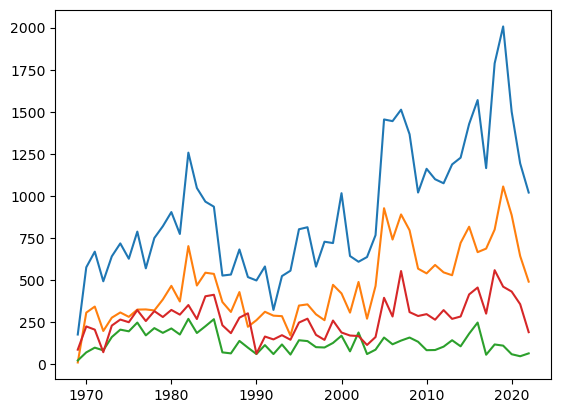

In [3]:
#Plotten

#Definieren der Wörter, deren Häufigkeit über die Zeit geplottet werden soll
words = ["ich", "du", "er", "sie"]

#Iteratives Filtern des Songkorpus
for word in words:
    sub_df = songkorpus[songkorpus.Token == word]
    #Plotten mit Angabe, was auf der x- bzw. y-Achse dargestellt werden soll
    plt.plot(sub_df.Jahr, sub_df.Häufigkeit) 

## Exkurs: Verschönern von Plots

Nun schauen wir uns Möglichkeiten an, diesen Plot wesentlich schöner und flexibler zu gestalten.

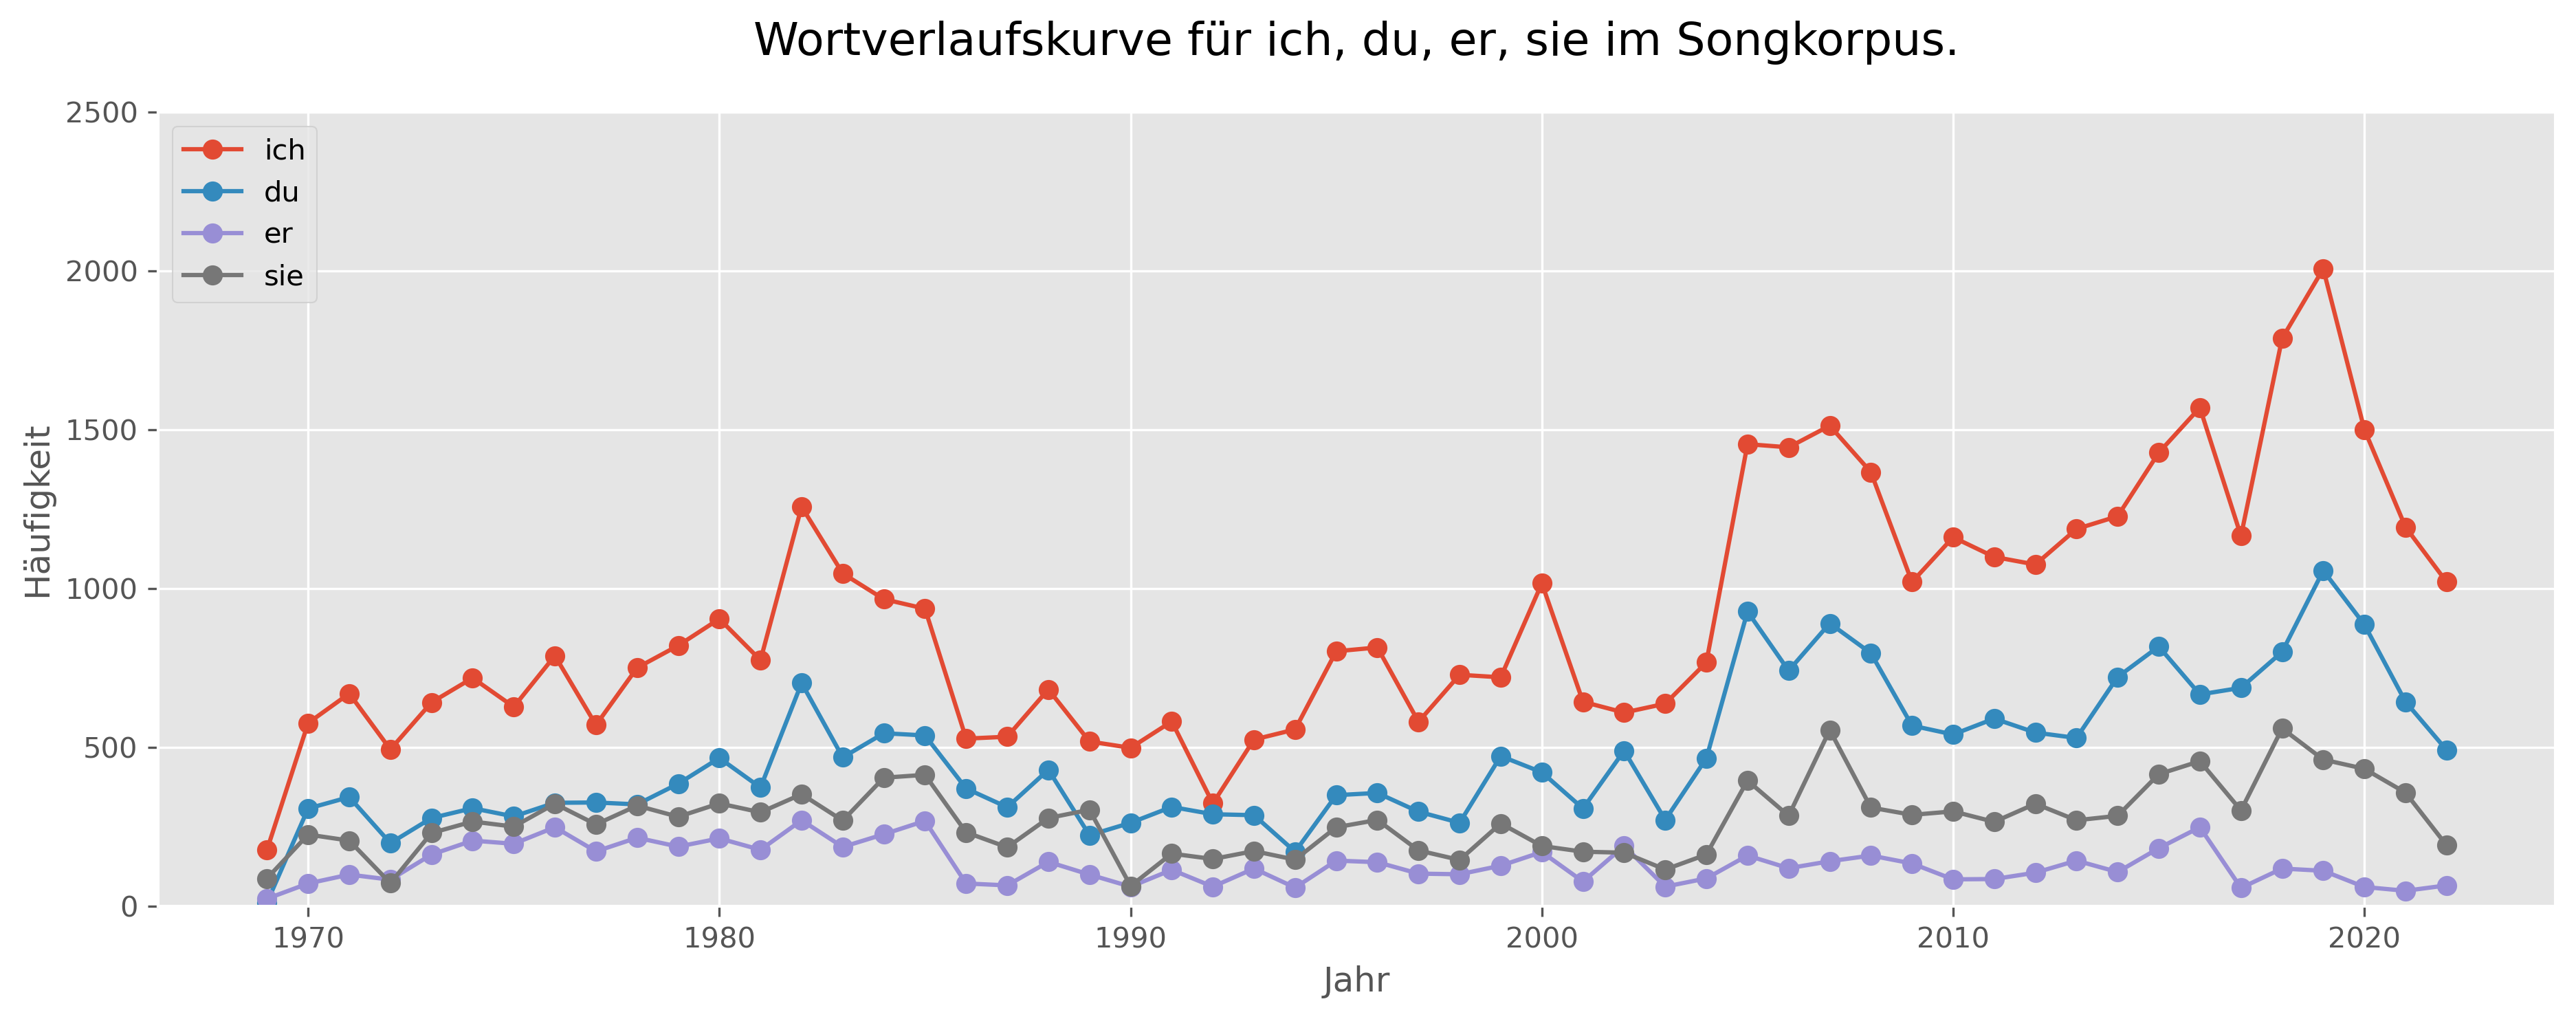

In [6]:
plt.figure(figsize=(15, 5), dpi=300) #Größe und Auflösung festlegen
#plt.rcParams["font.family"] = "sans-serif" #Schriftart festlegen
#plt.rcParams["text.usetex"] = True #LaTeX für Schriftsatz verwenden (setzt lokale Installation von LaTeX voraus)
plt.grid(True) #Festlegen, ob Gitterlinien angezeigt werden sollen

#Spezifizieren eines bestimmten Stils, z. B. "ggplot", "bmh", "fivethirtyeight", "tableau-colorblind10", vgl. 'print(plt.style.available)'
plt.style.use("ggplot")

#Iteratives Filtern des Songkorpus
for word in words:
    sub_df = songkorpus[songkorpus.Token == word]
    #Plotten mit Angabe, was auf der x- bzw. y-Achse dargestellt werden soll
    plt.plot(sub_df.Jahr, sub_df.Häufigkeit, marker='o') #zusätzlich Symbol bei jedem Datenpunkt

#Hinzufügen von Titel inkl. Schrifgröße und Padding, Achsenbeschriftungen und Legende
plt.title(f"Wortverlaufskurve für {', '.join([word for word in words])} im Songkorpus.", fontsize=16, pad=20)
plt.xlabel("Jahr"), plt.ylabel("Häufigkeit")
plt.legend(words, loc="upper left")

#plt.xlim(1968, 2023) #Festlegen von Beschränkungen der x-Achse
plt.ylim(0, 2500) #Festlegen von Beschränkungen der y-Achse

plt.show() #Nicht zwingend notwendig in JupyterLab

## Histogramm

Beispiel: Anzahl Sprachen nach Länder (aus [Winter 2020](https://appliedstatisticsforlinguists.org/bwinter_stats_proofs.pdf)) 

In [7]:
#Vorbereitung
climate_lang = pd.read_csv("../3_Dateien/Tabellarische_Daten/nettle_1999_climate.csv", encoding="utf8")
climate_lang

,Country,Population,Area,MGS,Langs
0,Algeria,4.41,6.38,6.60,18
1,Angola,4.01,6.10,6.22,42
2,Australia,4.24,6.89,6.00,234
3,Bangladesh,5.07,5.16,7.40,37
4,Benin,3.69,5.05,7.14,52
5,Bolivia,3.88,6.04,6.92,38
6,Botswana,3.13,5.76,4.60,27
7,Brazil,5.19,6.93,9.71,209
8,Burkina Faso,3.97,5.44,5.17,75
9,CAR,3.50,5.79,8.08,94


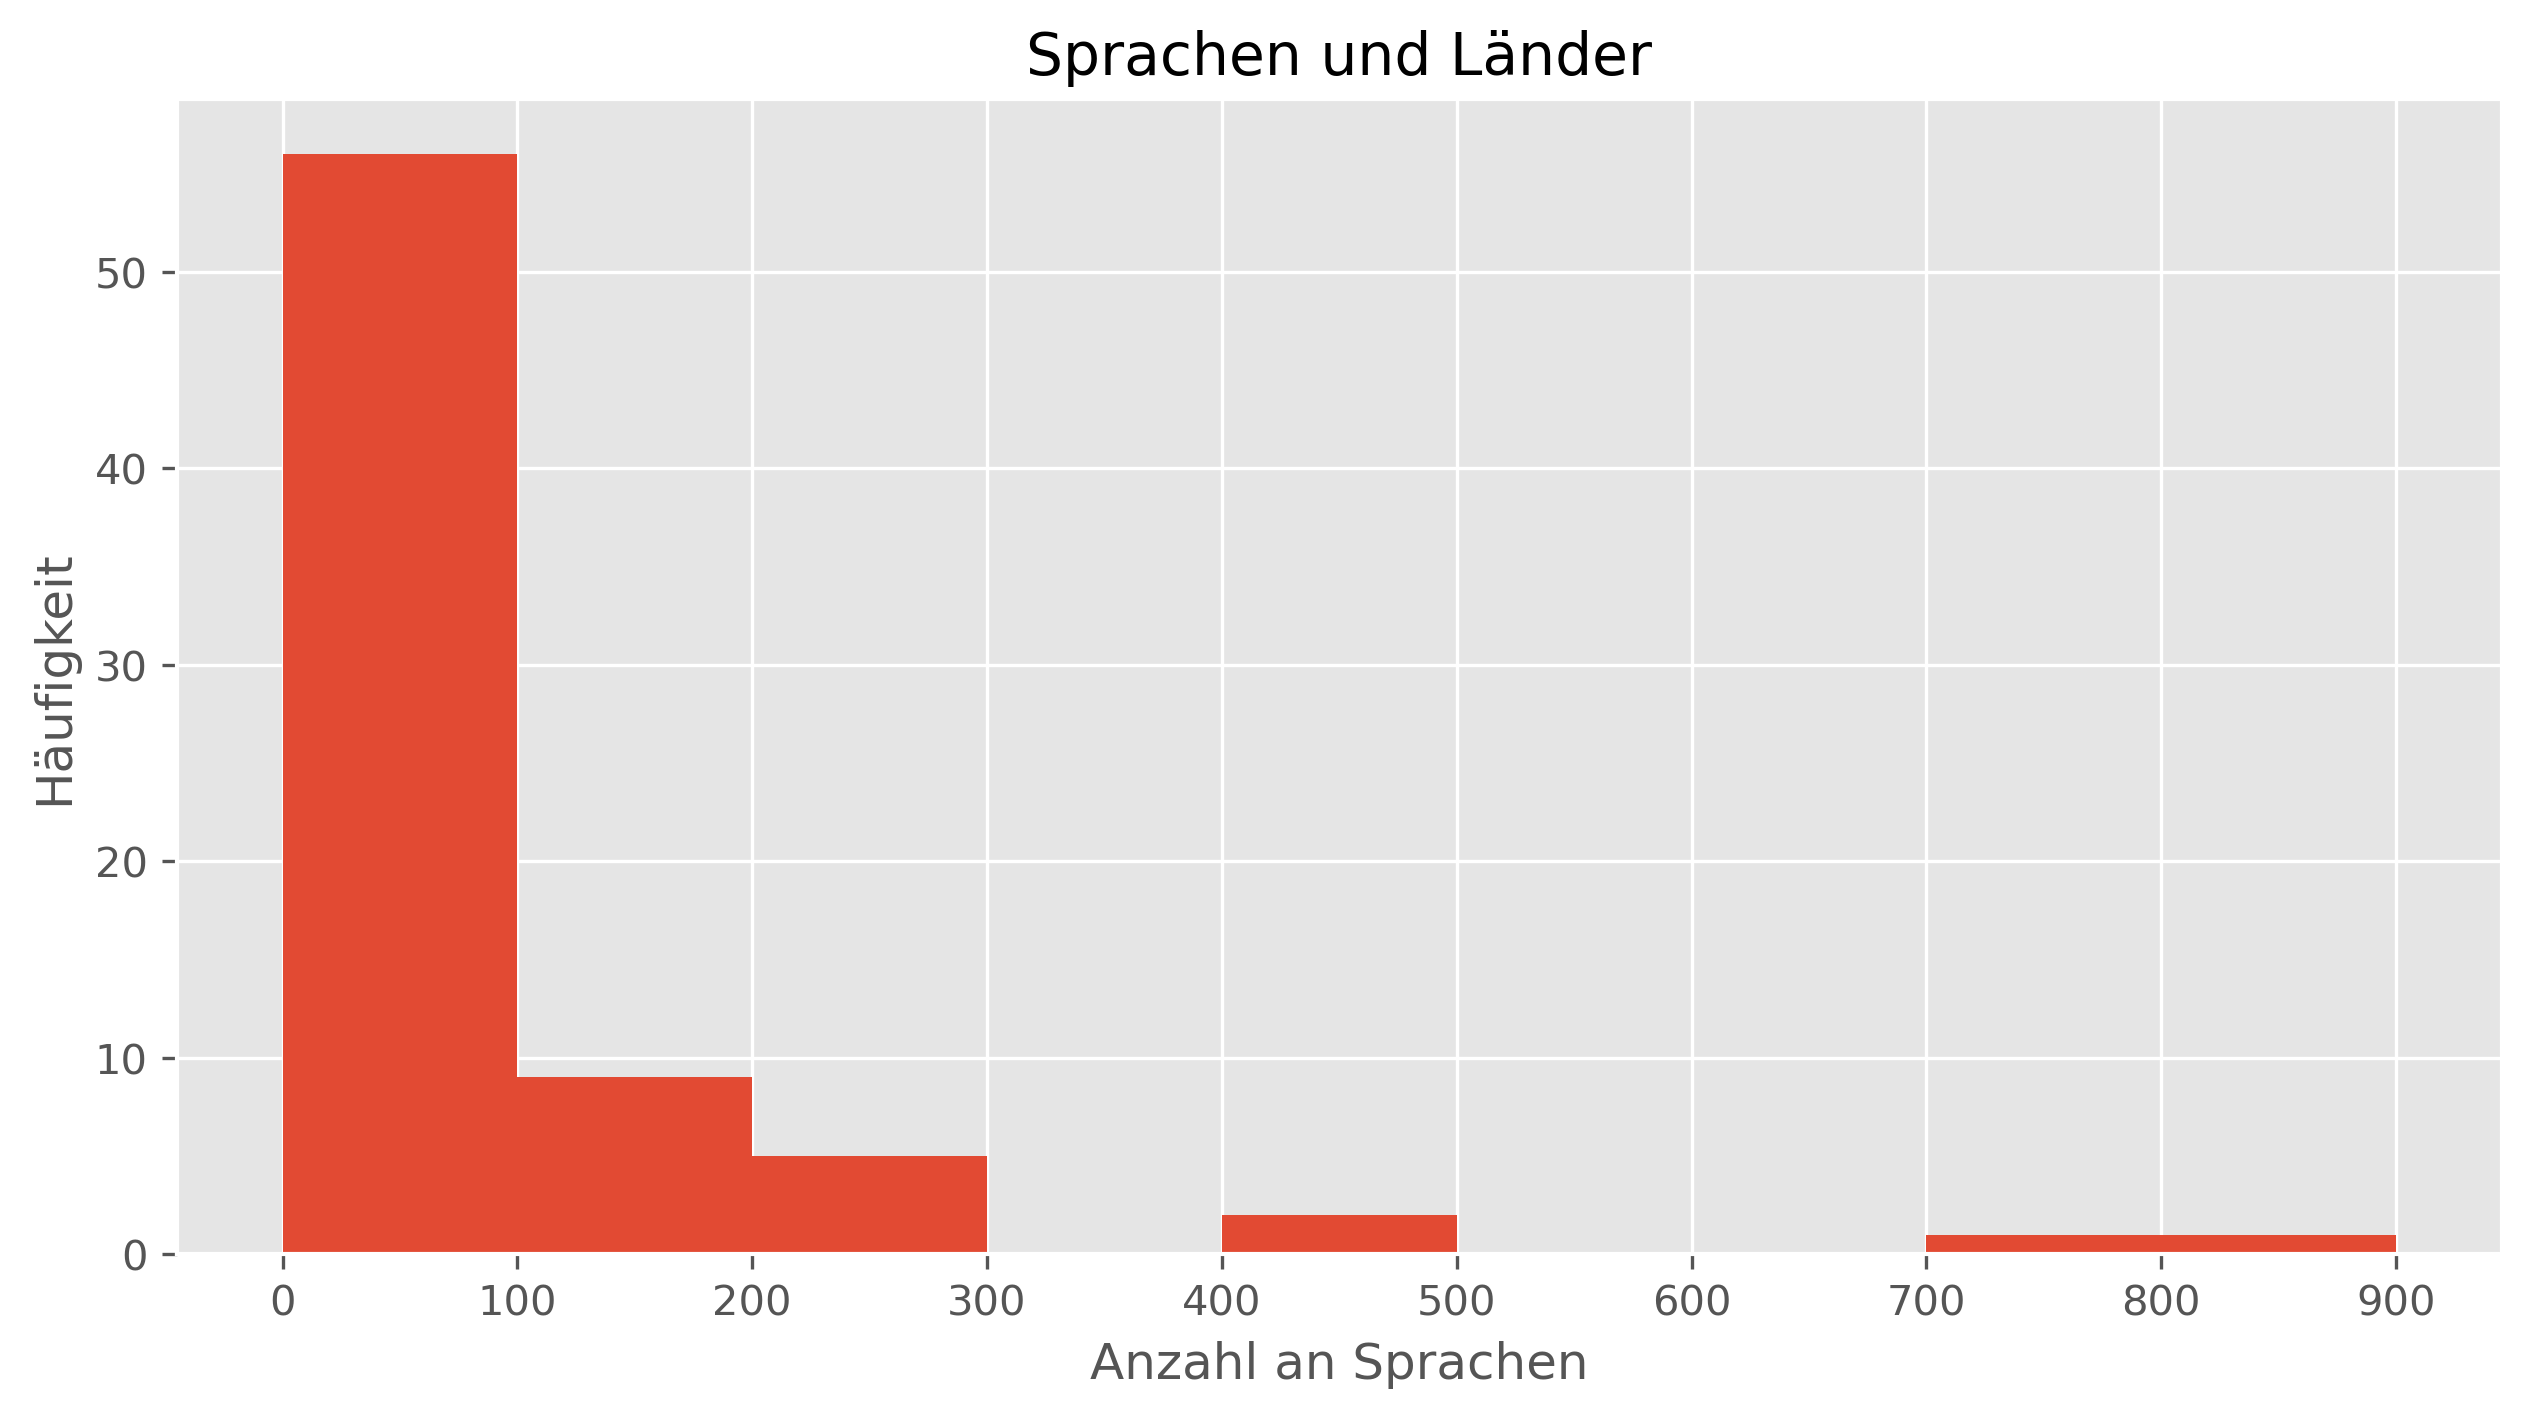

In [10]:
#Plotten
plt.figure(figsize=(10, 5), dpi=300)

plt.style.use("ggplot")

#Automatische Berechnung von "bin"-Größen
#plt.hist(climate_lang.Langs) 

#Manuelle Festlegung von "bin"-Größen
bin_width = 100
bins = np.arange(0, climate_lang.Langs.max() + bin_width, bin_width)
plt.hist(climate_lang.Langs, bins=bins) 
plt.xticks(bins)

plt.title("Sprachen und Länder", fontsize=14)
plt.xlabel("Anzahl an Sprachen", fontsize=12)
plt.ylabel("Häufigkeit", fontsize=12)

plt.show()

## Streudiagramm

Beispiel: Anzahl an Landessprachen nach Anzahl an Monaten, in denen angepflanzt werden kann (aus [Winter 2020](https://appliedstatisticsforlinguists.org/bwinter_stats_proofs.pdf))

In [11]:
#Daten nochmal inspizieren
climate_lang.describe()

,Population,Area,MGS,Langs
count,74.000000,74.000000,74.000000,74.000000
mean,3.991622,5.617703,7.028919,89.729730
std,0.671877,0.553006,3.135325,144.156431
min,2.010000,4.090000,0.000000,1.000000
25%,3.607500,5.222500,5.347500,17.250000
50%,3.990000,5.640000,7.355000,40.000000
75%,4.392500,6.032500,9.192500,93.750000
max,5.930000,6.930000,12.000000,862.000000


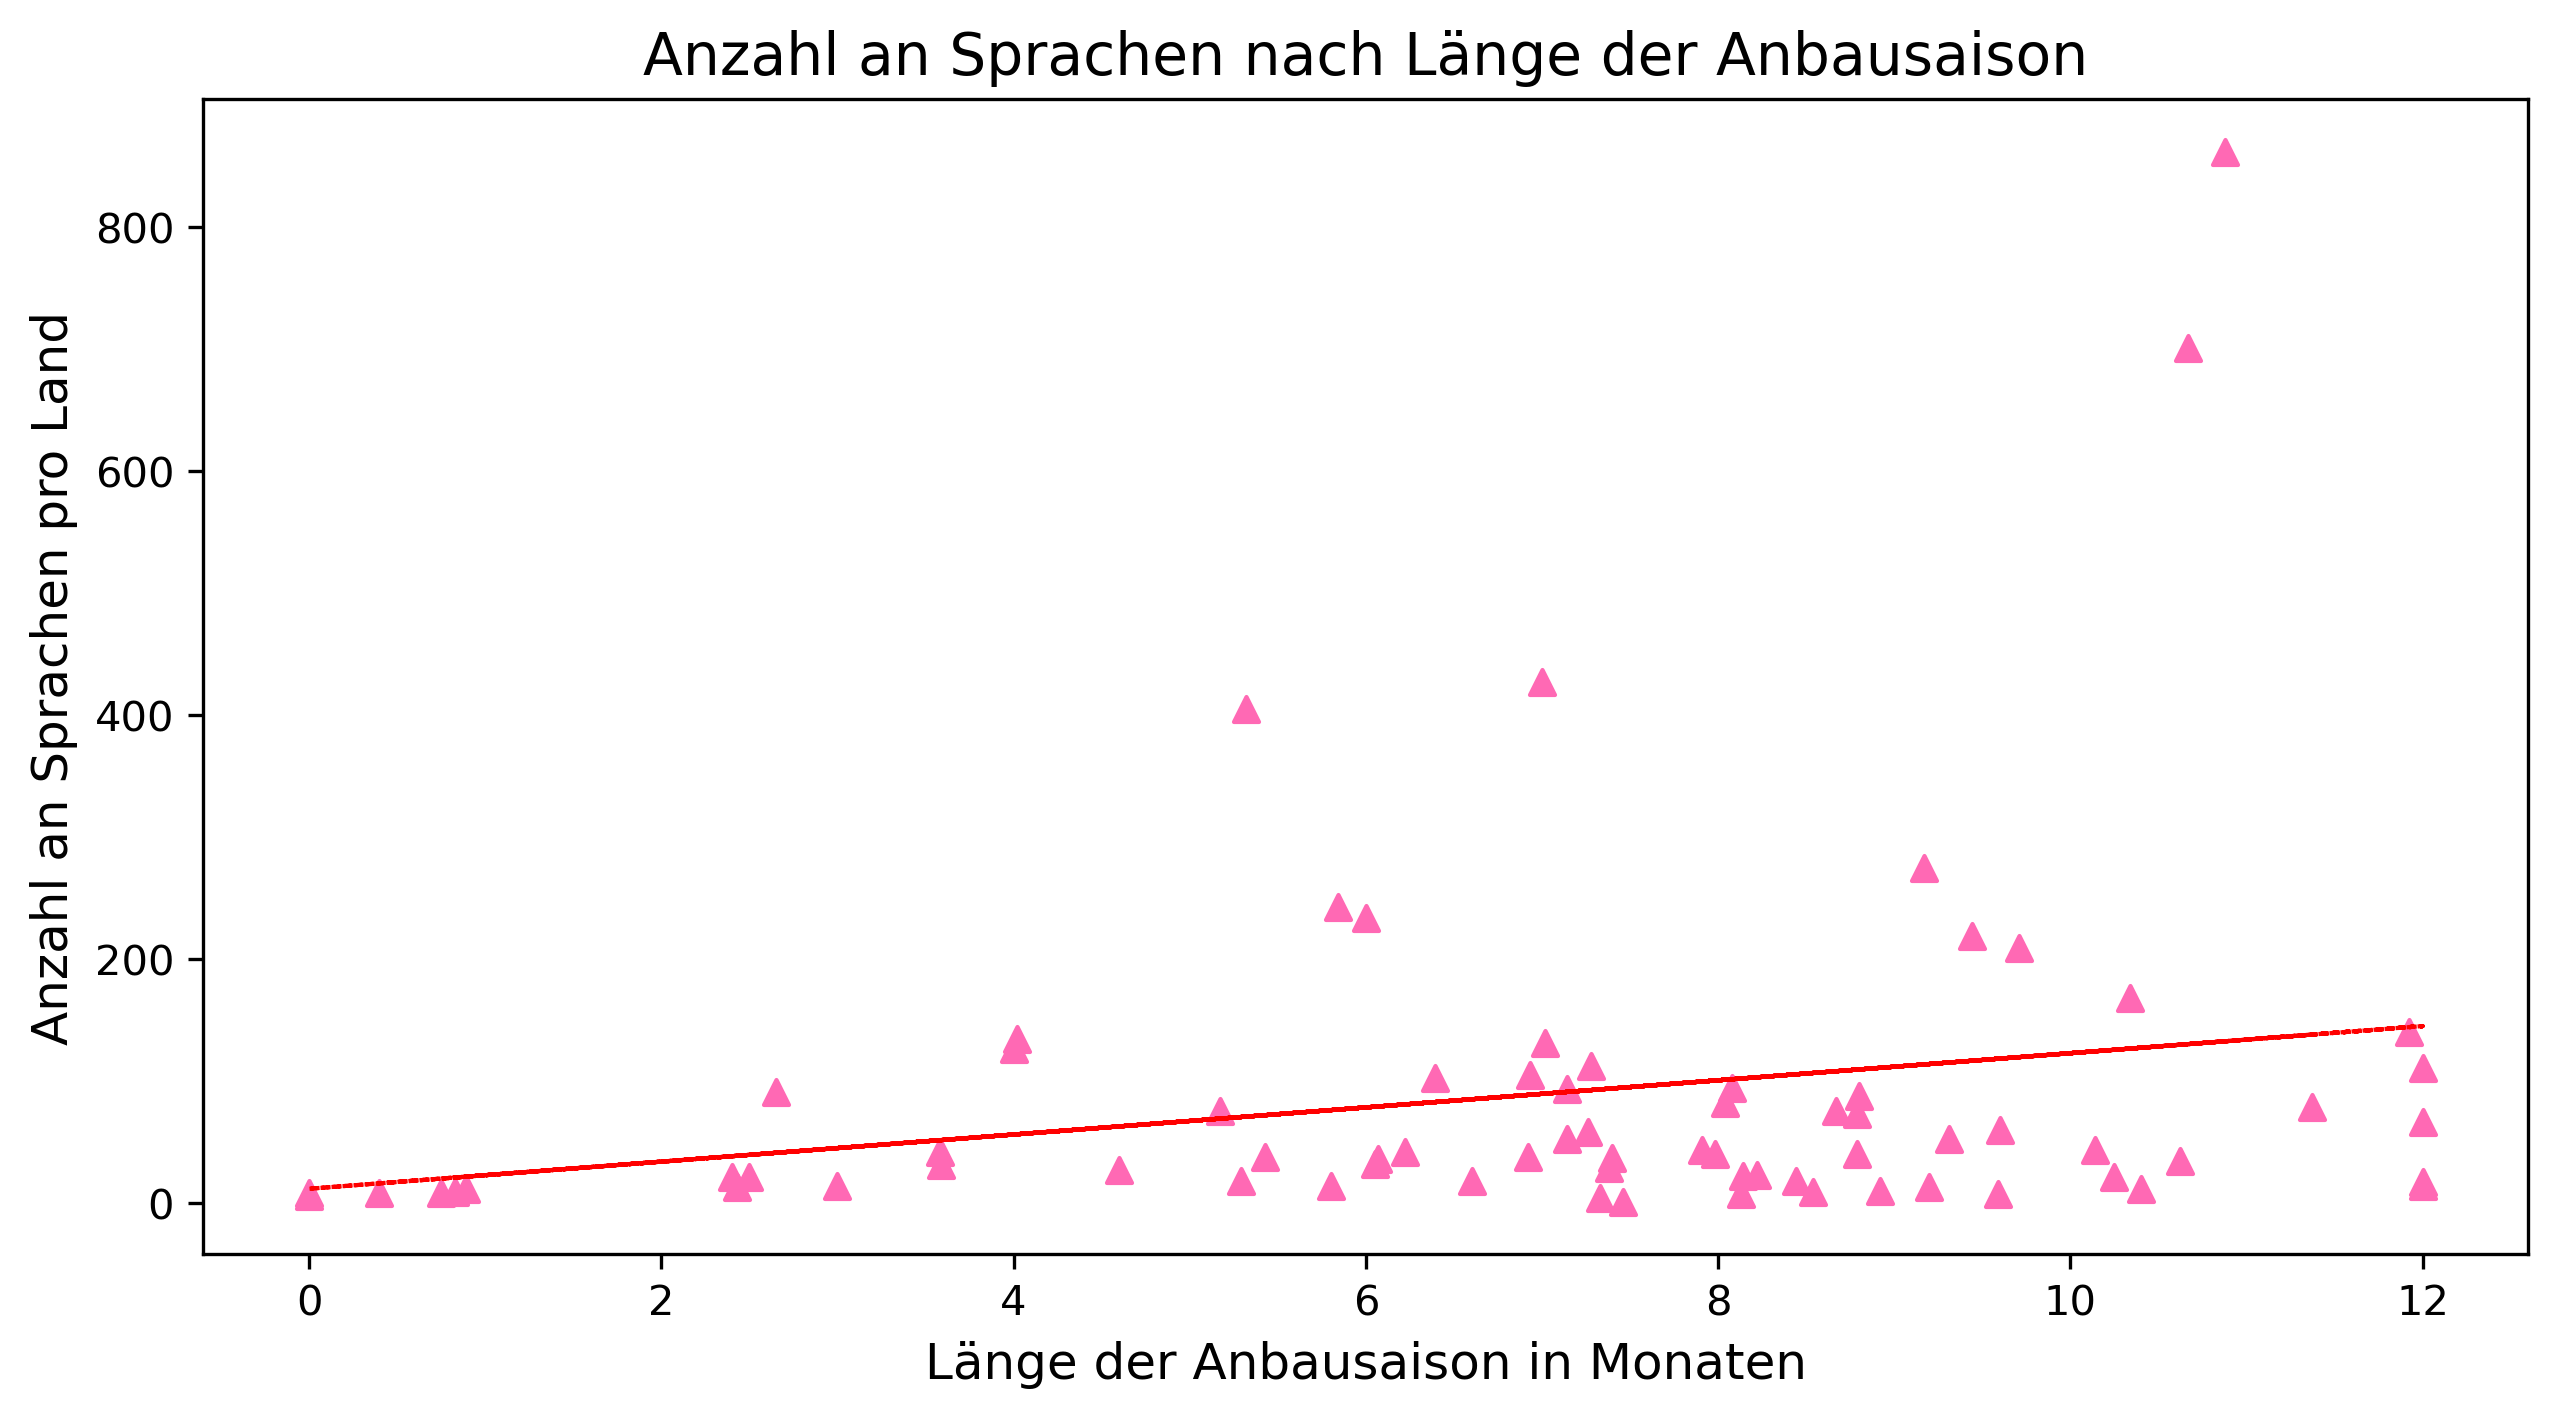

In [12]:
#Plotten
plt.figure(figsize=(10, 5), dpi=300)

plt.style.use("default") #Zurücksetzen des 'style'-Parameters

plt.scatter(climate_lang.MGS, climate_lang.Langs, marker="^", color="#FF69B4") #Hexadezimaler Farbcode

plt.title("Anzahl an Sprachen nach Länge der Anbausaison", fontsize=14)
plt.xlabel("Länge der Anbausaison in Monaten", fontsize=12)
plt.ylabel("Anzahl an Sprachen pro Land", fontsize=12)

#Regressionsgerade fitten und plotten
slope, intercept = np.polyfit(climate_lang.MGS, climate_lang.Langs, 1)
plt.plot(climate_lang.MGS, slope*climate_lang.MGS + intercept, color="red", linestyle=":", linewidth=1)

plt.show()

## Exkurs: Beschriften von Plots

vgl. Dokumentation zu [Text](https://matplotlib.org/stable/users/explain/text/text_intro.html#text-intro) bzw. [Annotation](https://matplotlib.org/stable/users/explain/text/annotations.html#annotations)

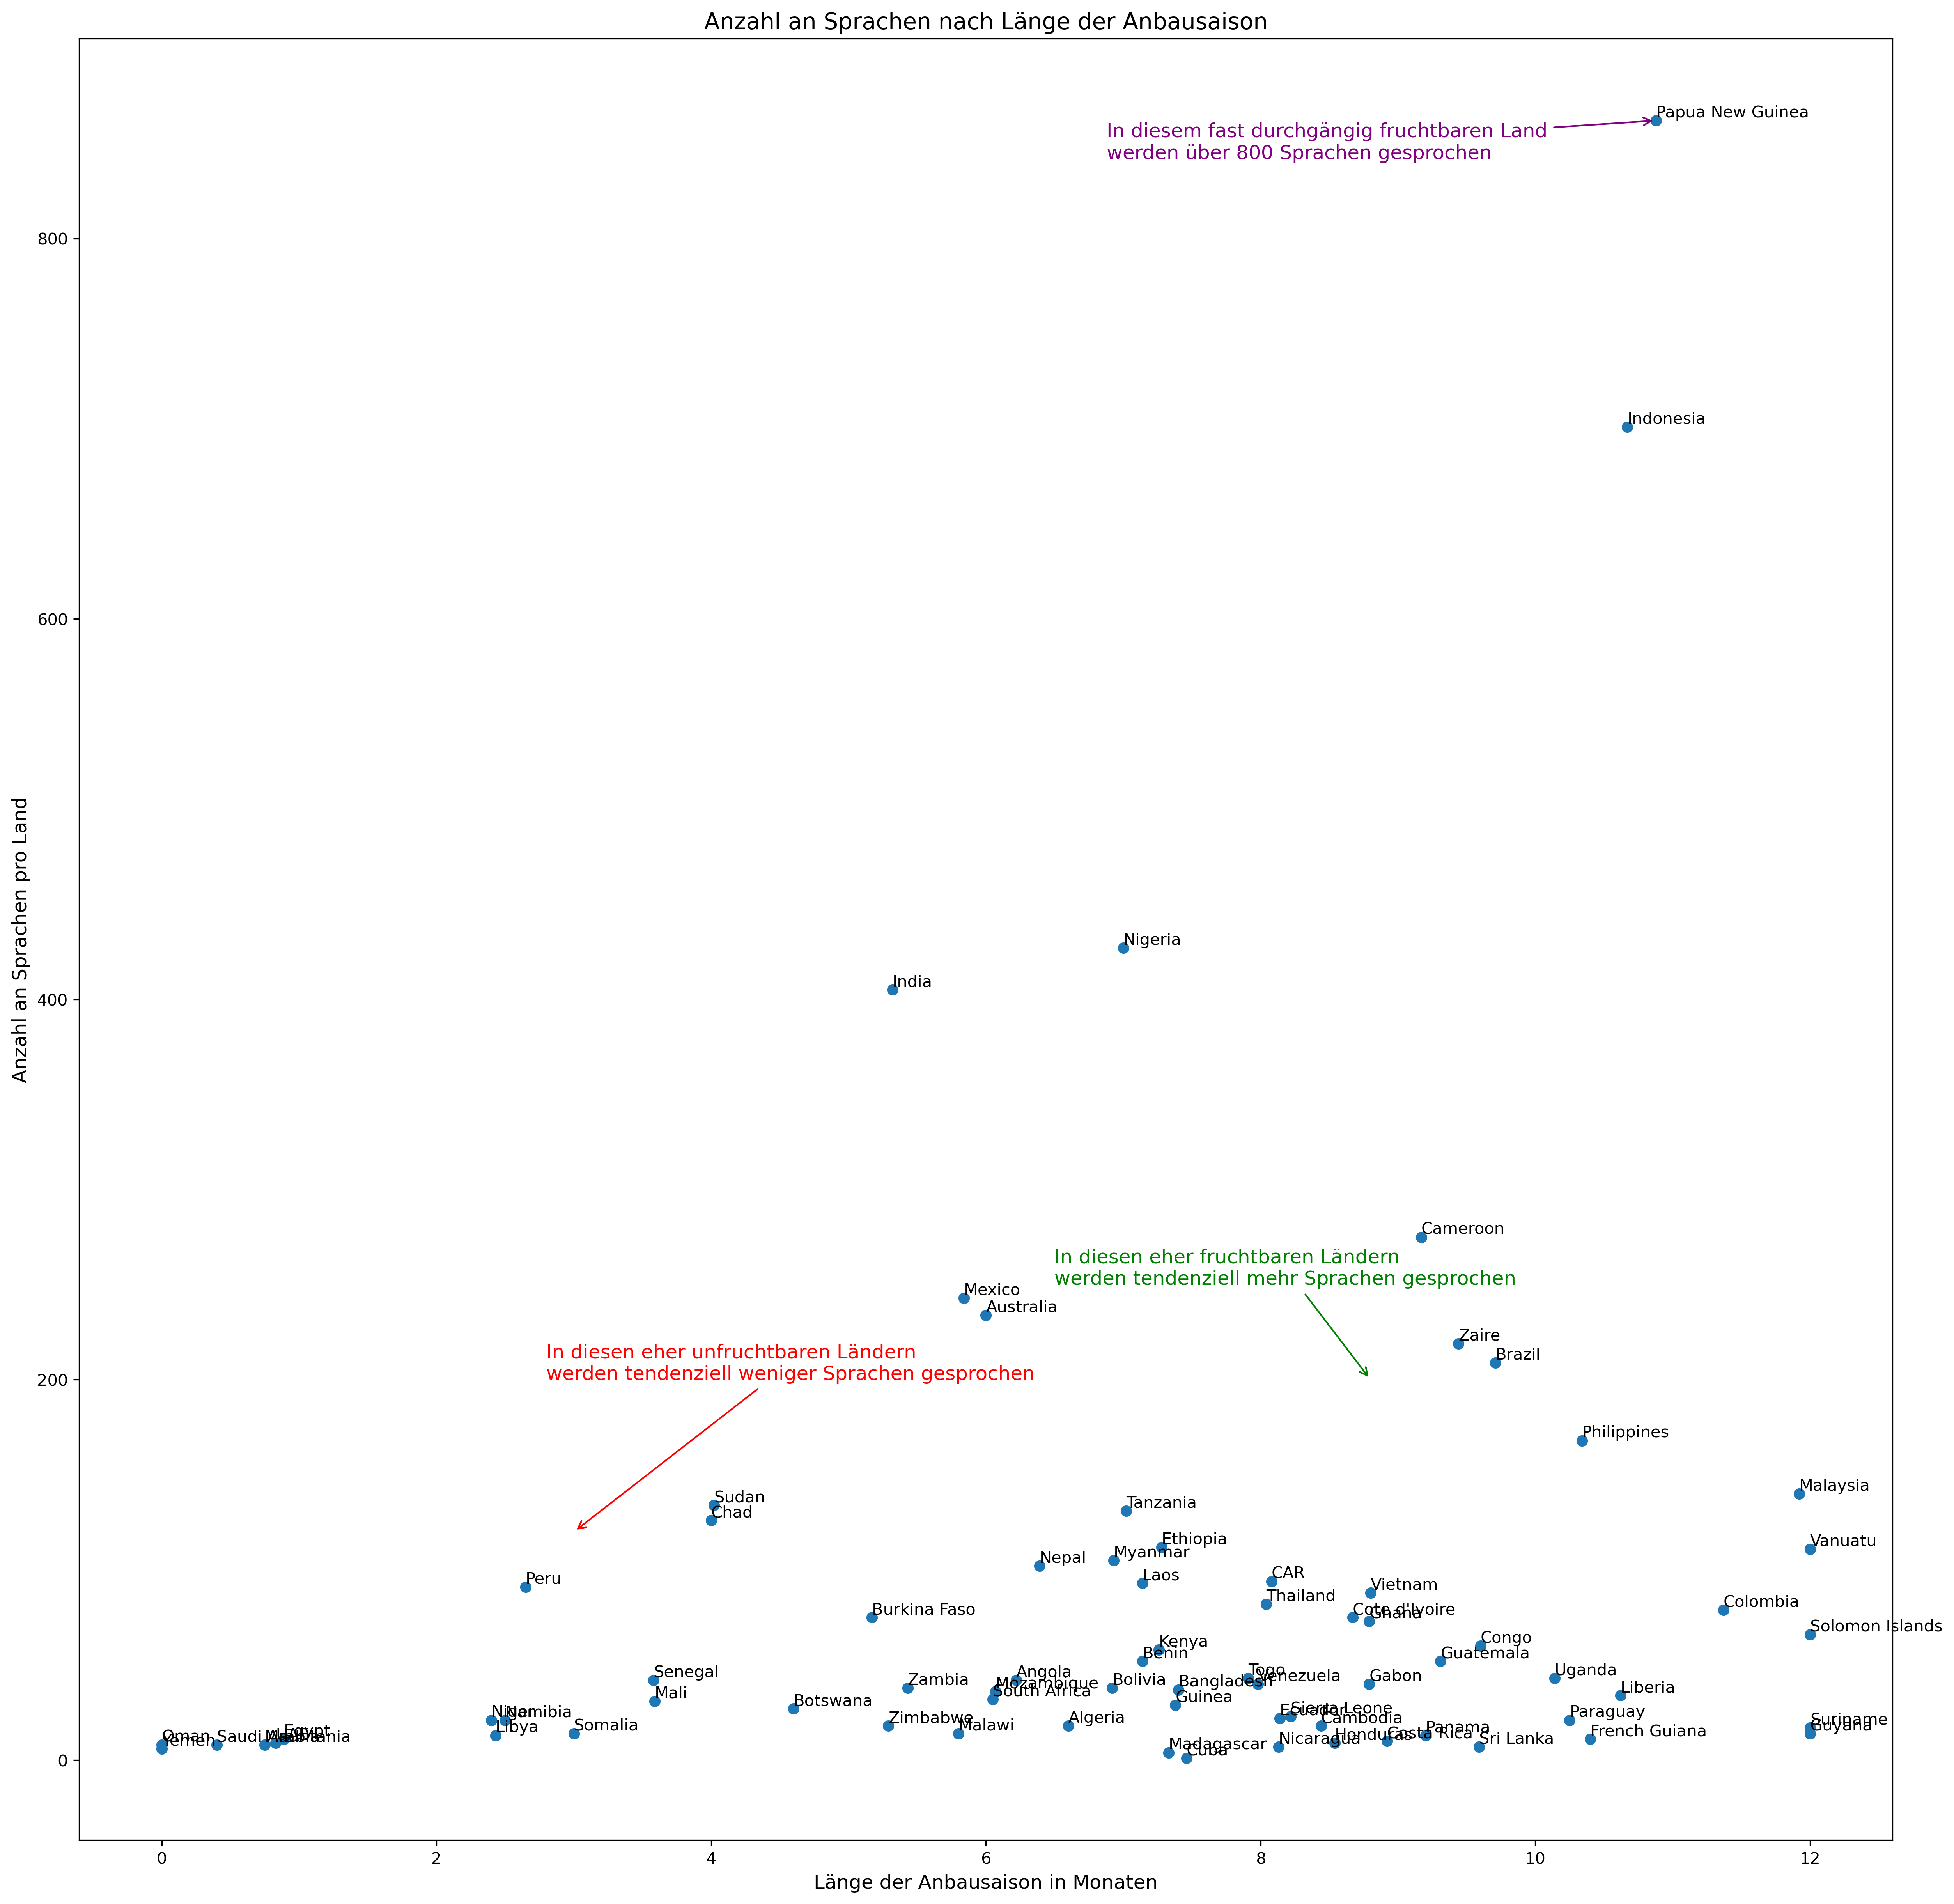

In [13]:
plt.figure(figsize=(20,20), dpi=300)
plt.scatter(climate_lang.MGS, climate_lang.Langs)

plt.title("Anzahl an Sprachen nach Länge der Anbausaison", fontsize=14)
plt.xlabel("Länge der Anbausaison in Monaten", fontsize=12)
plt.ylabel("Anzahl an Sprachen pro Land", fontsize=12)

#Hinzufügen aller Labels
for i, row in climate_lang.iterrows():
    plt.text(x=row.MGS, y=row.Langs, s=row.Country, ha="left", va="bottom")

#Hinzufügen weiterer Annotationen
png = climate_lang[climate_lang.Country == "Papua New Guinea"]
x, y = png.MGS.values[0], png.Langs.values[0]
text = "In diesem fast durchgängig fruchtbaren Land\nwerden über 800 Sprachen gesprochen"
plt.annotate(text, xy=(x,y), xytext=(x-4, y-20), arrowprops=dict(arrowstyle="->", color="purple"), fontsize=12, color="purple")

text = "In diesen eher fruchtbaren Ländern\nwerden tendenziell mehr Sprachen gesprochen"
plt.annotate(text, xy=(8.8, 200), xytext=(6.5, 250), arrowprops=dict(arrowstyle="->", color="green"), fontsize=12, color="green")

text = "In diesen eher unfruchtbaren Ländern\nwerden tendenziell weniger Sprachen gesprochen"
plt.annotate(text, xy=(3, 120), xytext=(2.8, 200), arrowprops=dict(arrowstyle="->", color="red"), fontsize=12, color="red")

plt.show()

## Balkendiagramm

Beispiel: Verteilung von Modalverben nach Wahlprogrammen

In [35]:
#Vorbereitung
tokens = pd.read_csv("../3_Dateien/Tabellarische_Daten/tokens.csv", encoding="utf8")

#Filtern nach Modalverben
modal_verbs = tokens[tokens.lemma.isin(["Auto"])]

#Gruppieren des gefilteren DataFrames nach Partei und errechnen der relativen Häufigkeiten der Modalverben
modal_verbs_by_party = modal_verbs.groupby("party").lemma.value_counts(normalize=True).unstack().fillna(0)
modal_verbs_by_party

lemma,Auto
party,
BSW,1.0
CDU,1.0
Gruene,1.0
Linke,1.0


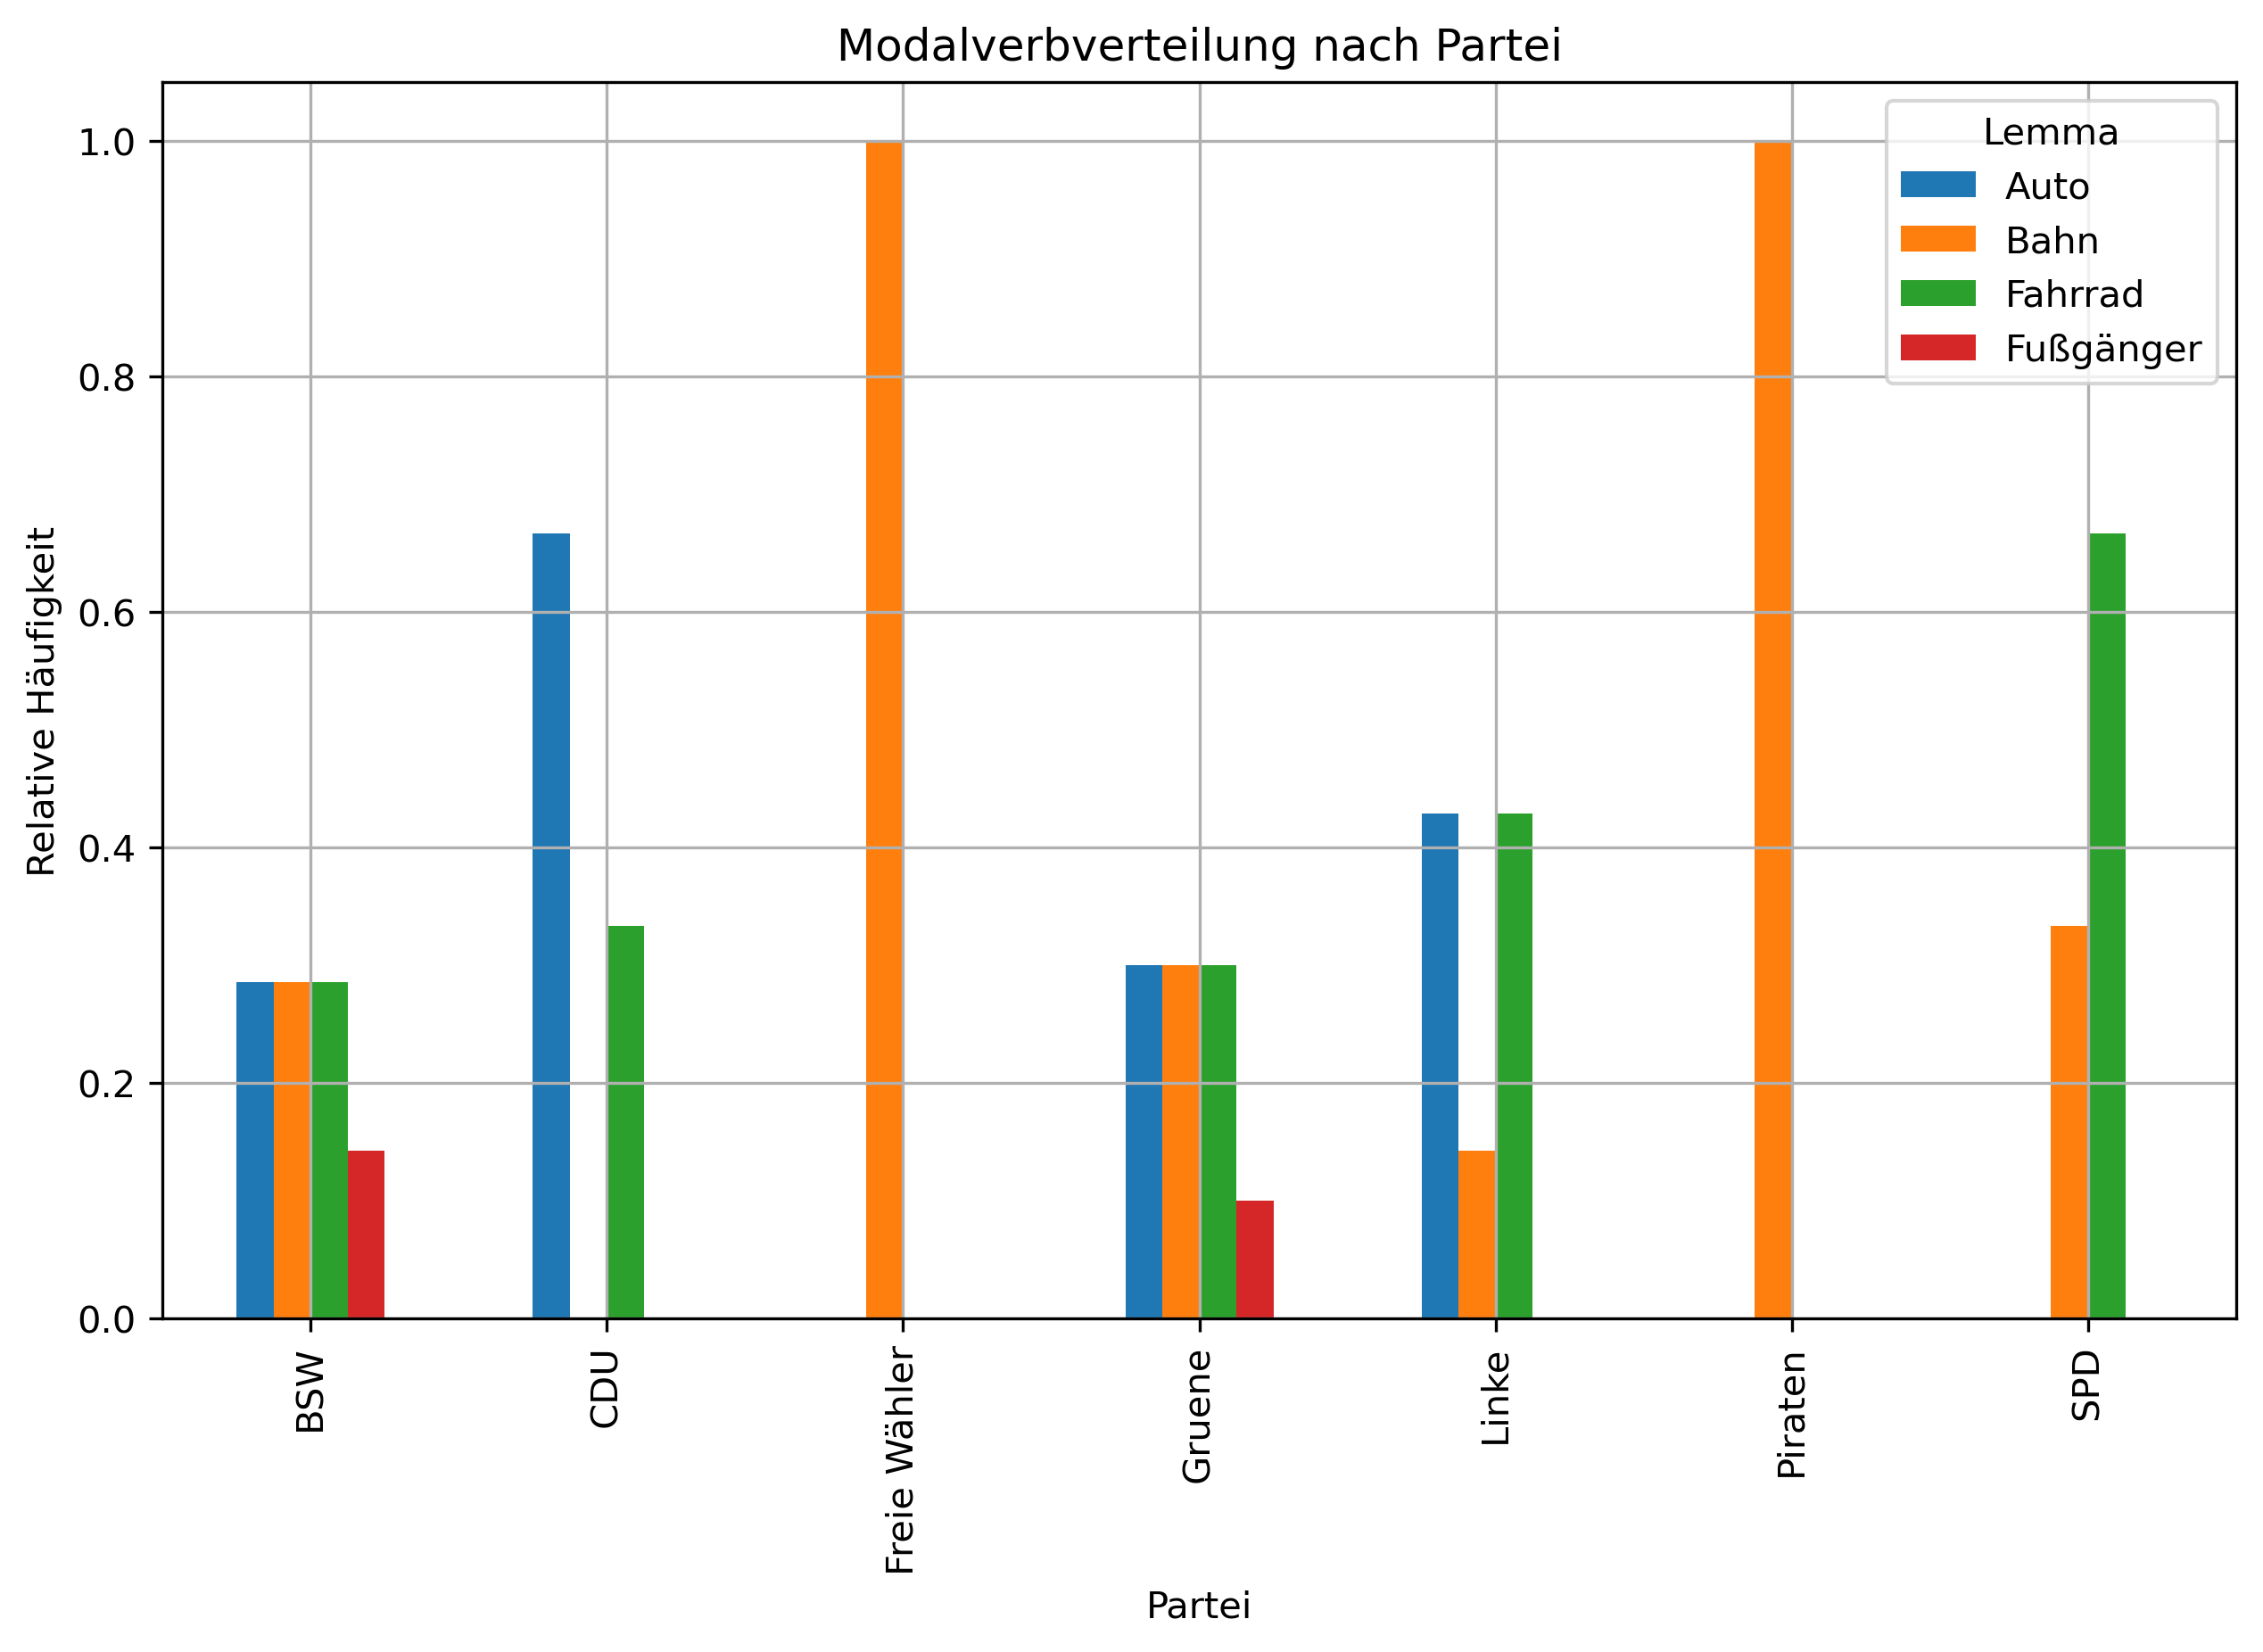

In [30]:
#Plotten

#Kombination aus 'pandas'-Plotting mit Syntax 'df.plot', objektorientierter und statusbasierter Herangehensweise
fig, ax = plt.subplots(figsize=(10, 6), dpi=300) 
modal_verbs_by_party.plot(kind="bar", ax=ax) #"barh" für horizontal, vgl. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

plt.xlabel("Partei")
plt.ylabel("Relative Häufigkeit")
plt.title("Modalverbverteilung nach Partei")
plt.legend(title="Lemma")
plt.grid(True)
plt.show()

### Gestapeltes Balkendiagramm

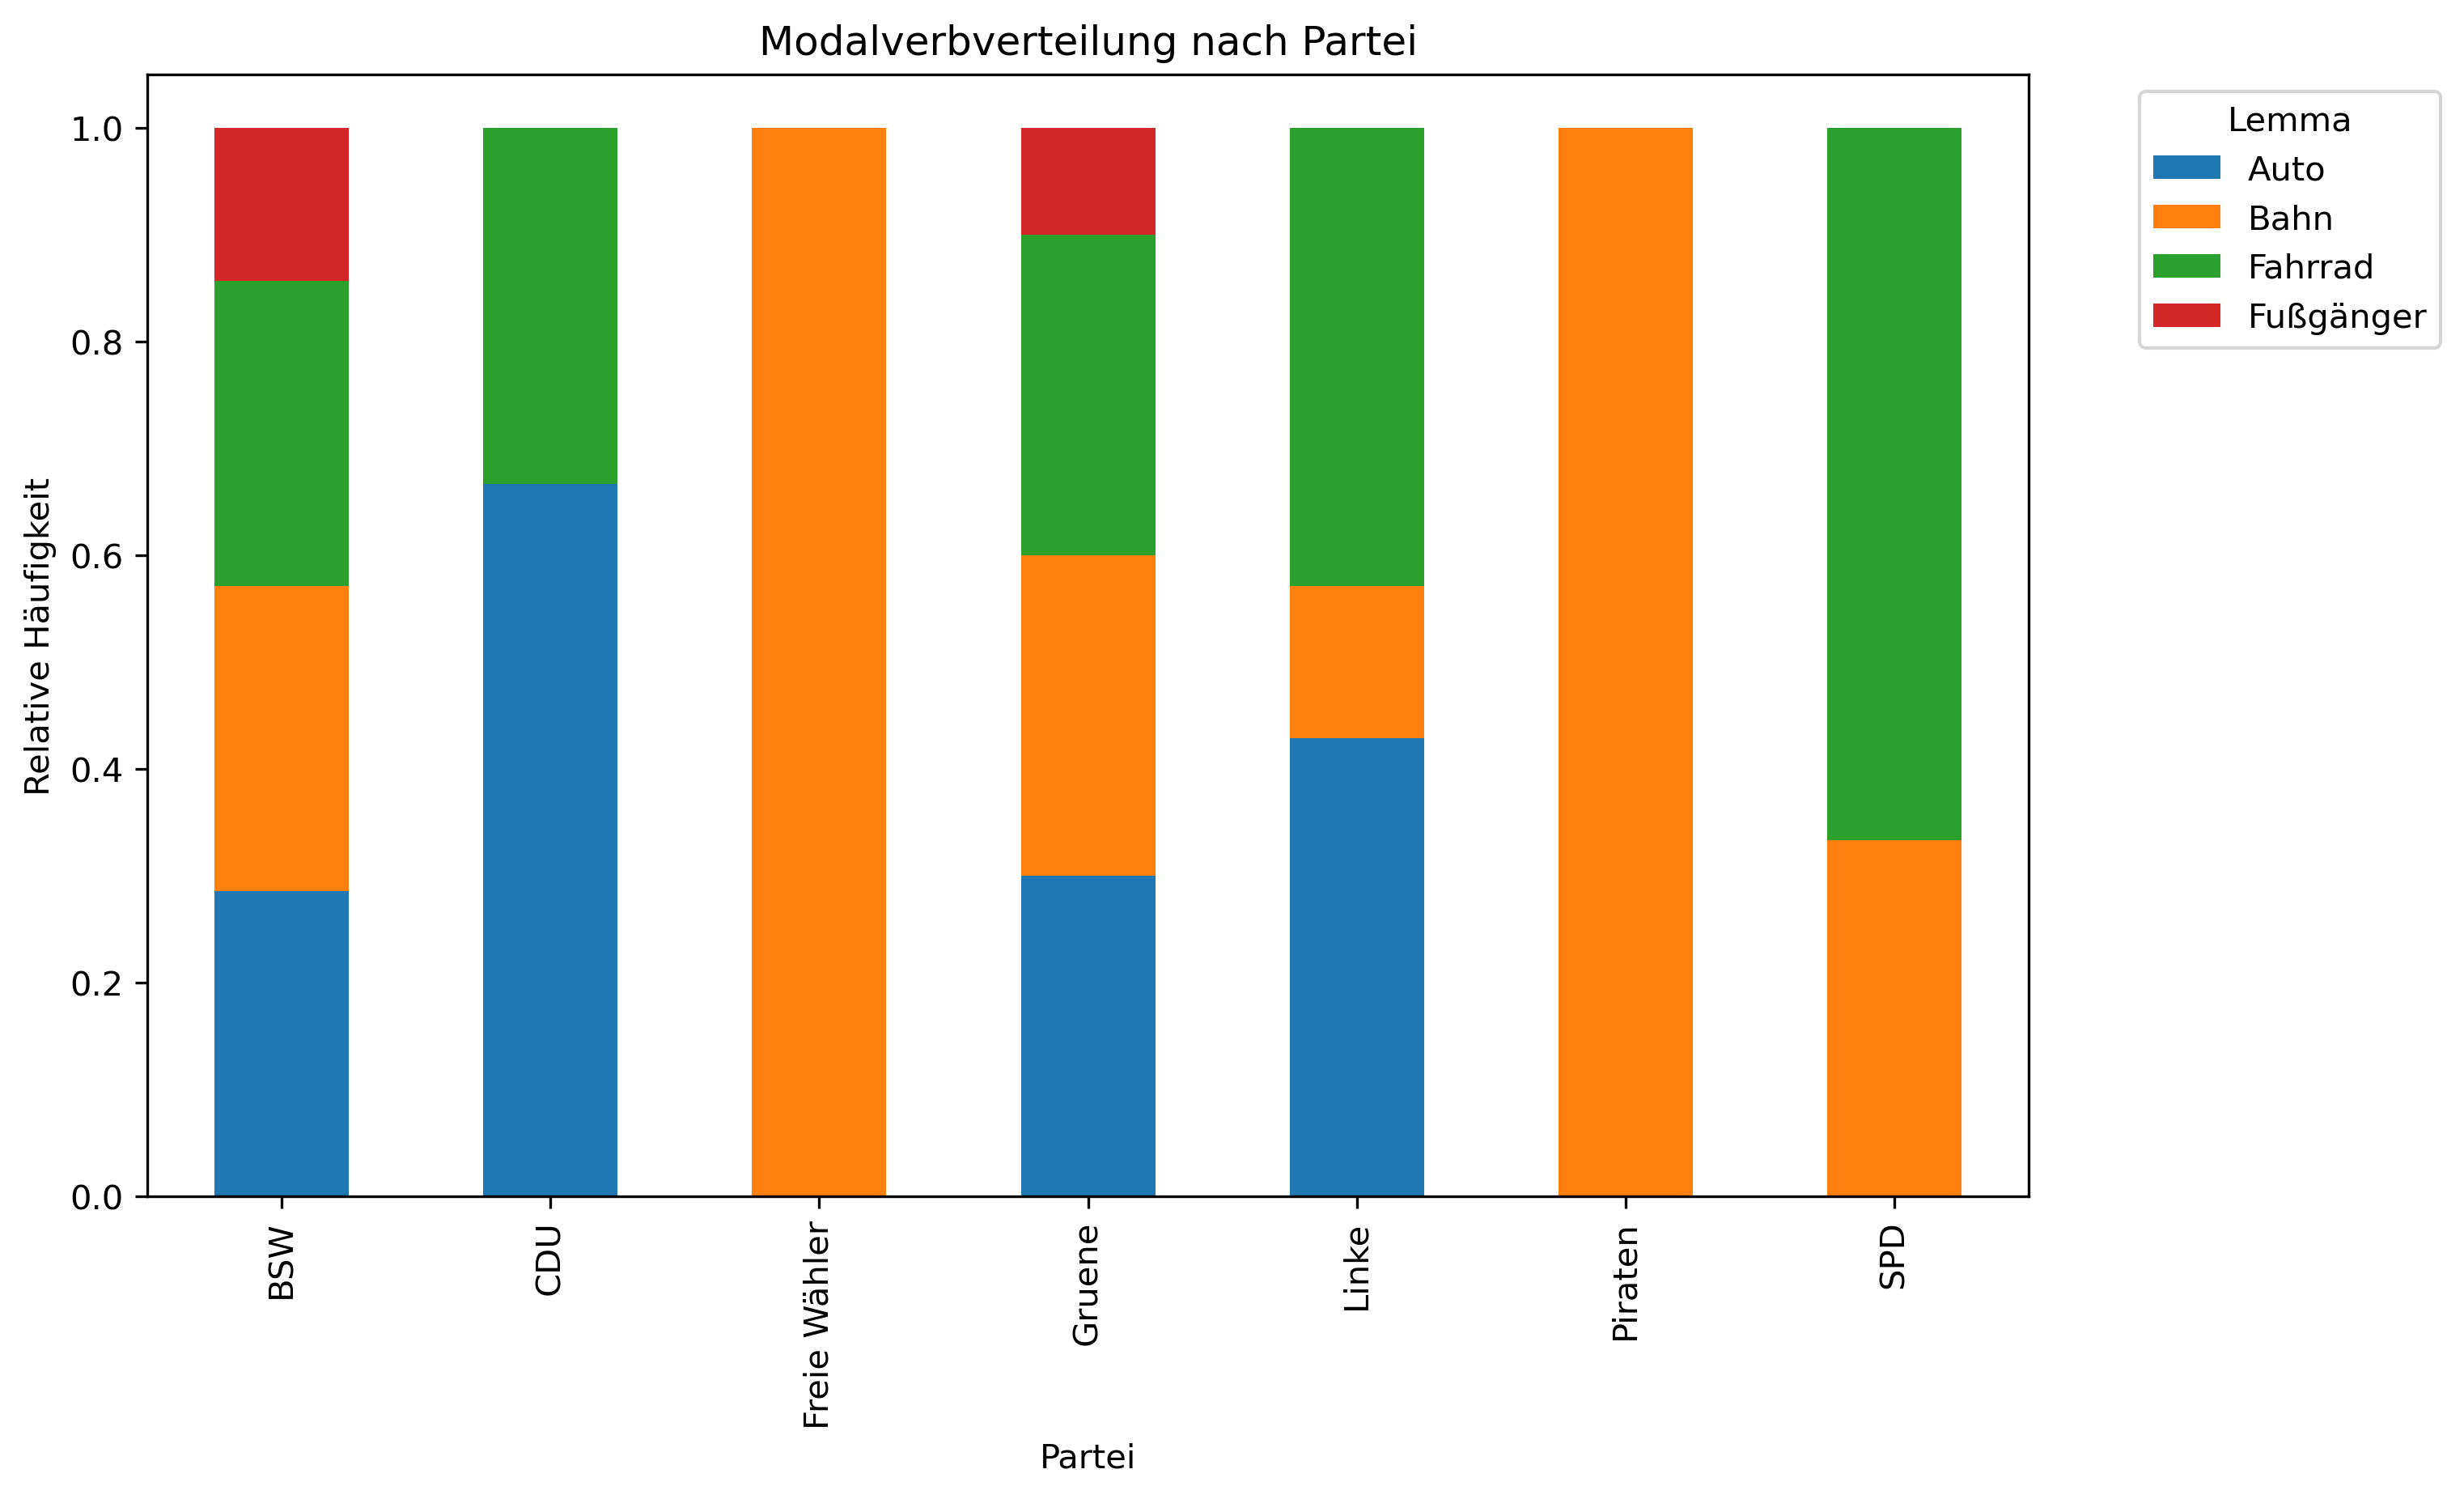

In [31]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

#'pandas'-Plotting mit Syntax 'df.plot' und Angabe der Achse
modal_verbs_by_party.plot(kind="bar", stacked=True, ax=ax)

plt.xlabel("Partei")
plt.ylabel("Relative Häufigkeit")
plt.title("Modalverbverteilung nach Partei")
plt.legend(title="Lemma", bbox_to_anchor=(1.05, 1), loc="upper left")

#Diagrammverschönerung über objektorientierte Syntax (gleicher Effekt)
#ax.set_xlabel("Partei")
#ax.set_ylabel("Relative Häufigkeit")
#ax.set_title("Modalverbverteilung nach Partei")
#ax.legend(title="Lemma", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

### Abweichungsbalkendiagramm

In [32]:
#Vorbereitung I

#Durchschnitt pro Modalverb errechnen
lemma_means = modal_verbs_by_party.mean(axis=0) 
lemma_means

lemma
Auto         0.240136
Bahn         0.437415
Fahrrad      0.287755
Fußgänger    0.034694
dtype: float64

In [33]:
#Vorbereitung II

#Durchschnitt pro Modalverb von Parteiwerten abziehen, um Über-/Unternutzung zu errechnen
adjusted_counts = modal_verbs_by_party.subtract(lemma_means)
adjusted_counts.style.background_gradient(cmap='RdYlGn') #Einfärben des DataFrames

lemma,Auto,Bahn,Fahrrad,Fußgänger
party,,,,
BSW,0.045578,-0.151701,-0.002041,0.108163
CDU,0.426531,-0.437415,0.045578,-0.034694
Freie Wähler,-0.240136,0.562585,-0.287755,-0.034694
Gruene,0.059864,-0.137415,0.012245,0.065306
Linke,0.188435,-0.294558,0.140816,-0.034694
Piraten,-0.240136,0.562585,-0.287755,-0.034694
SPD,-0.240136,-0.104082,0.378912,-0.034694


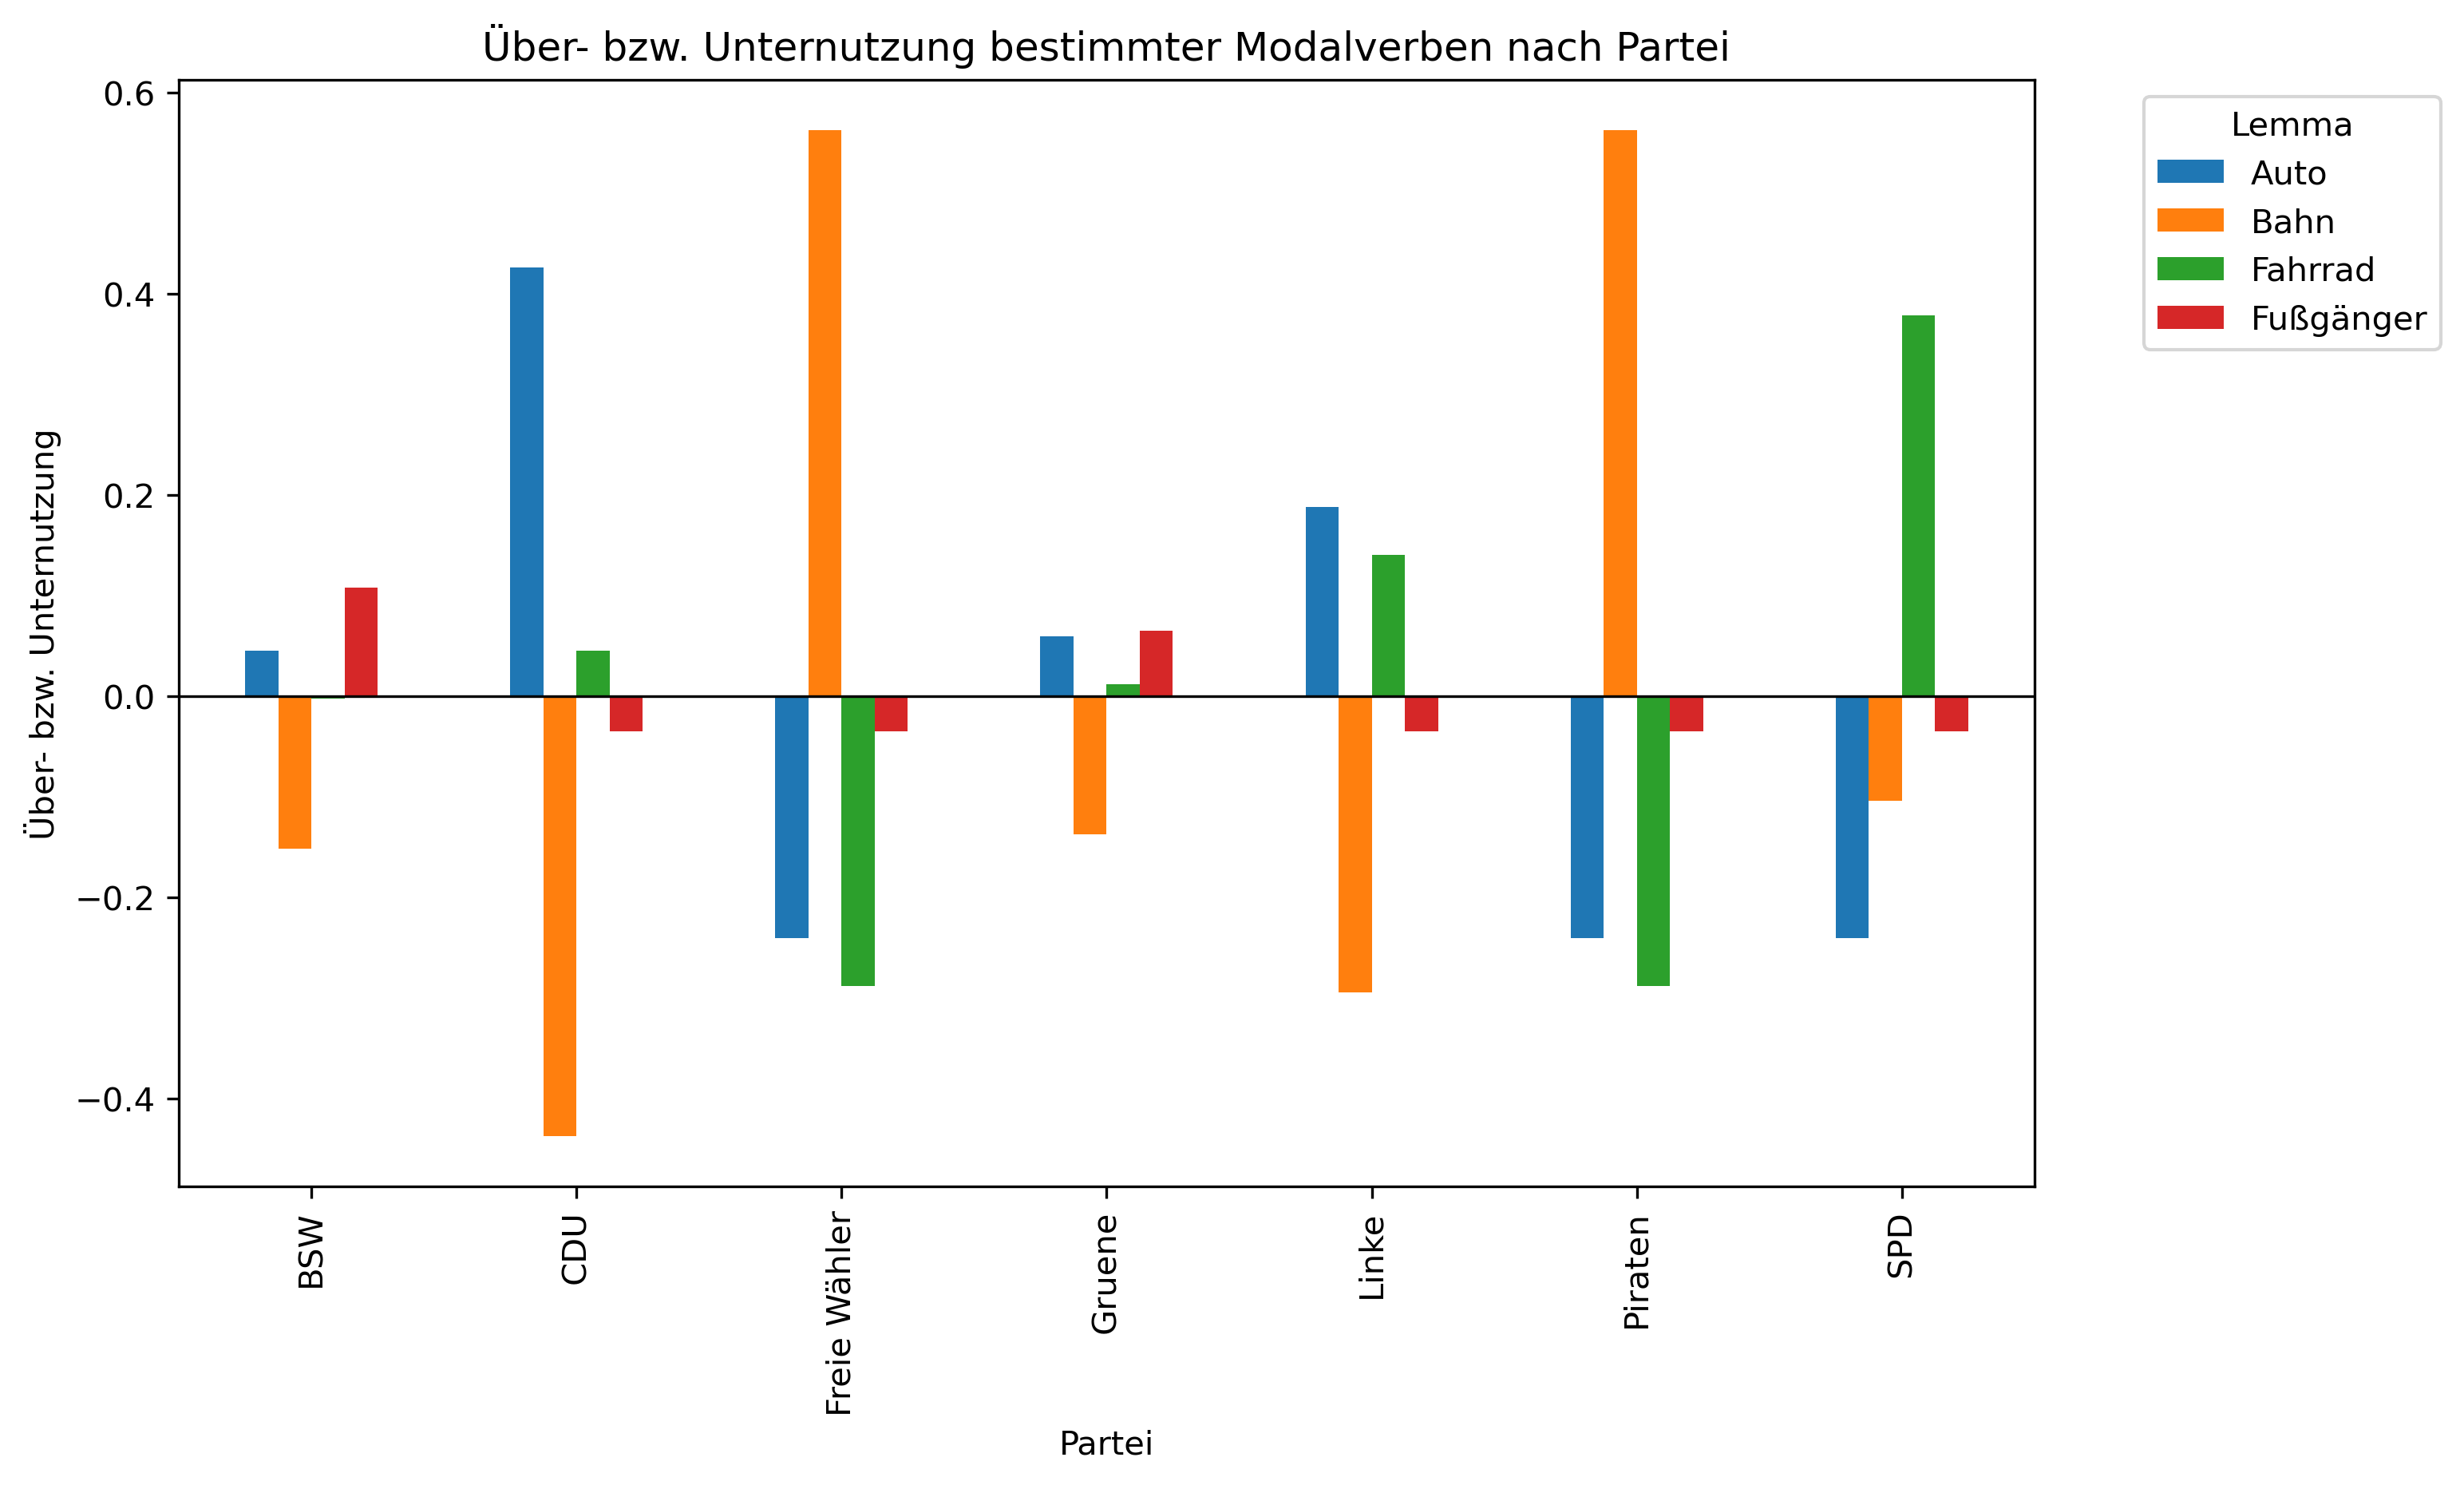

In [34]:
#Plotten
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

adjusted_counts.plot(kind="bar", ax=ax)

#Diagrammverschönerung über objektorientierte Syntax
ax.axhline(0, color="black", linewidth=0.8) #Horizontale Line bei Null hinzufügen
ax.set_xlabel("Partei")
ax.set_ylabel("Über- bzw. Unternutzung")
ax.set_title("Über- bzw. Unternutzung bestimmter Modalverben nach Partei")
ax.legend(title="Lemma", bbox_to_anchor=(1.05, 1), loc="upper left")

#plt.savefig("../3_Dateien/Output/modal_verbs_per_party.png") #Externes Speichern
plt.show()

## Boxplot

Beispiel: Vergleich von Verben des Denkens im Deutschen vs. Schwedischen mit Blick auf semantische Spezifizität ([Masterarbeit von Yannick](https://onlinelibrary.wiley.com/doi/10.1111/stul.12179))

In [22]:
#Vorbereitung
thinking_verbs = pd.read_csv("../3_Dateien/Tabellarische_Daten/thinking_verbs_GER_SWE.csv", encoding="utf8")
thinking_verbs.index.name = "Participants"

results_german, results_swedish = thinking_verbs.filter(regex="^GER"), thinking_verbs.filter(regex="^SWE")
results_german

,GER_COND1,GER_COND2,GER_COND3,GER_COND4
Participants,,,,
0,2.166667,0.833333,1.166667,1.666667
1,2.000000,1.500000,1.166667,2.666667
2,1.500000,1.166667,0.833333,1.333333
3,1.333333,1.000000,1.000000,1.500000
4,1.000000,1.000000,1.000000,1.000000
5,1.166667,1.000000,1.166667,2.333333
6,2.166667,1.000000,1.000000,1.666667
7,2.000000,1.333333,1.166667,2.166667
8,2.166667,1.500000,1.000000,2.666667


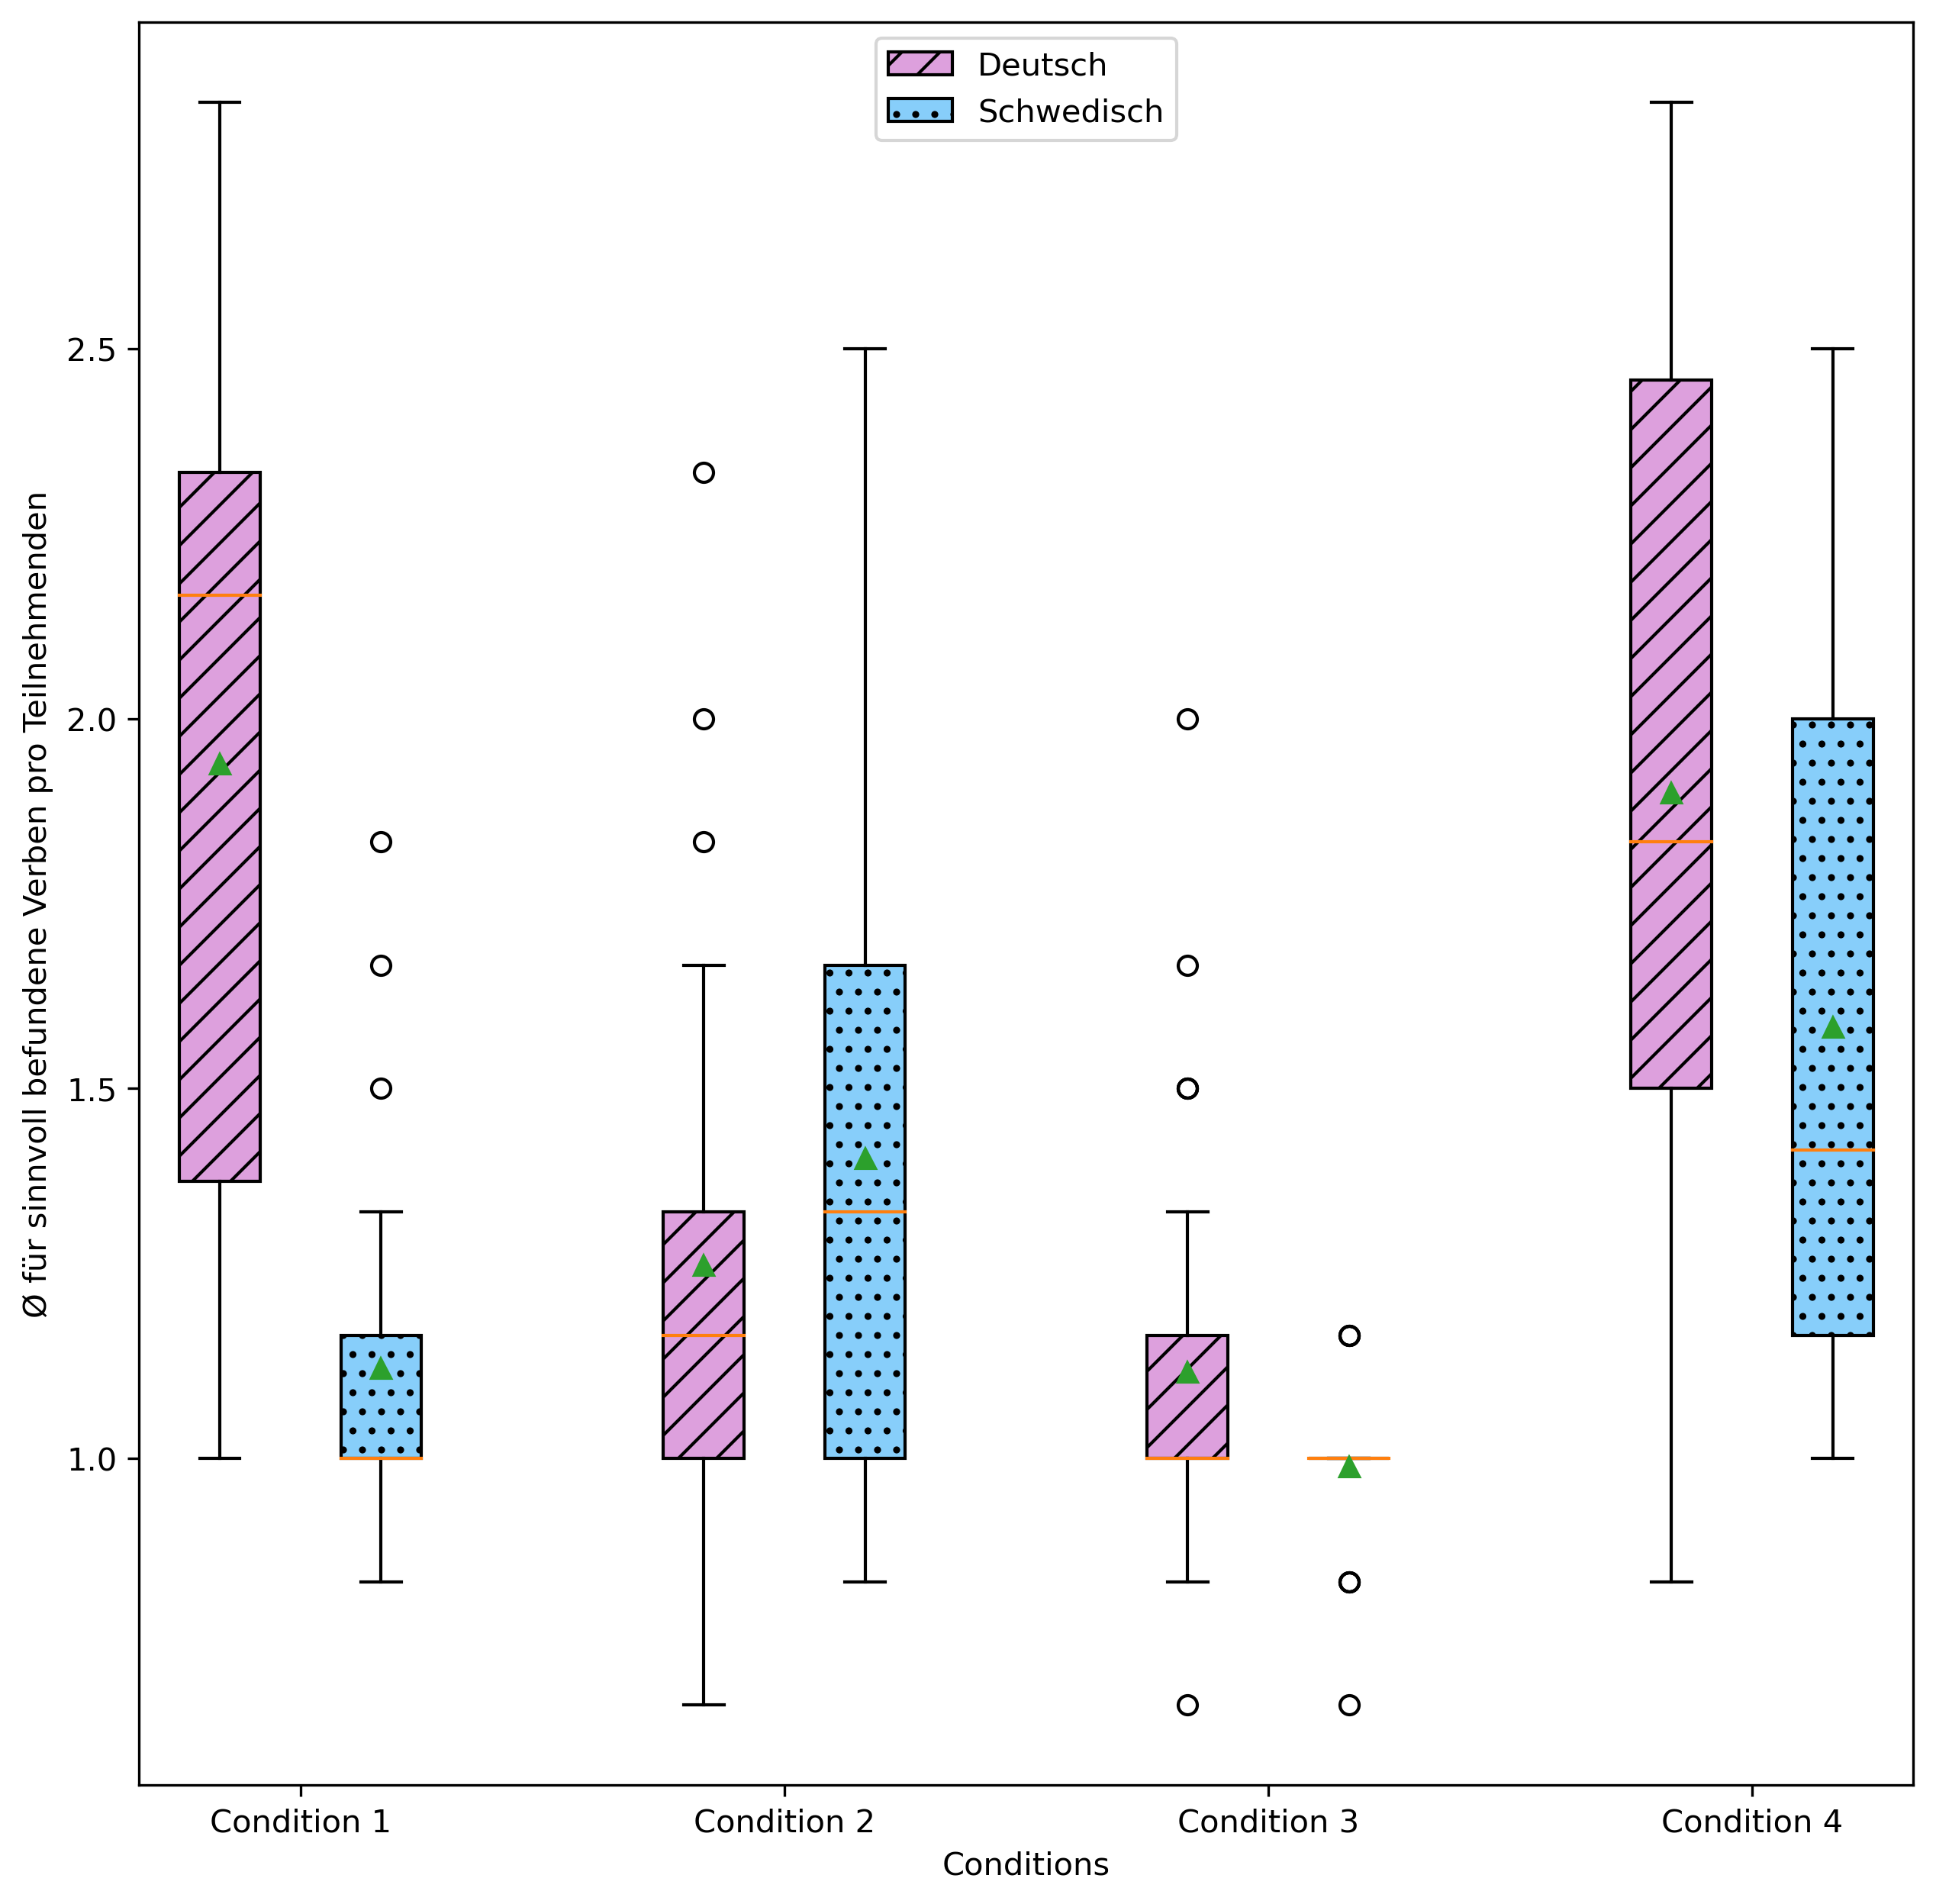

In [23]:
#Plotten
plt.figure(figsize=(10,10), dpi=300)

"""Da die beiden Sprachen für die vier "Conditions" nebeneinander geplottet werden sollen,
definieren wir die Positionen entlang der x-Achse manuell."""
positions_german, positions_swedish = [0,3,6,9], [1,4,7,10]

#Sequentielles Plotten mit 'hatch'-Parameter
plt.boxplot(results_german, positions=positions_german, patch_artist=True, showmeans=True, boxprops=dict(facecolor="plum", hatch="//"))
plt.boxplot(results_swedish, positions=positions_swedish, patch_artist=True, showmeans=True, boxprops=dict(facecolor="lightskyblue", hatch=".."))

#Manuelles Hinzufügen einer Legende entsprechend der Muster
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, facecolor="plum", edgecolor="black", hatch="//", label="Deutsch"),
                    plt.Rectangle((0, 0), 1, 1, facecolor="lightskyblue", edgecolor="black", hatch="..", label="Schwedisch")], loc="upper center")


plt.xlabel("Conditions")
plt.xticks([0.5, 3.5, 6.5, 9.5], labels=["Condition 1", "Condition 2", "Condition 3", "Condition 4"])
plt.ylabel("Ø für sinnvoll befundene Verben pro Teilnehmenden")
plt.show()

## Mehrere Diagramme

Mit objektorientierter Herangehensweise.

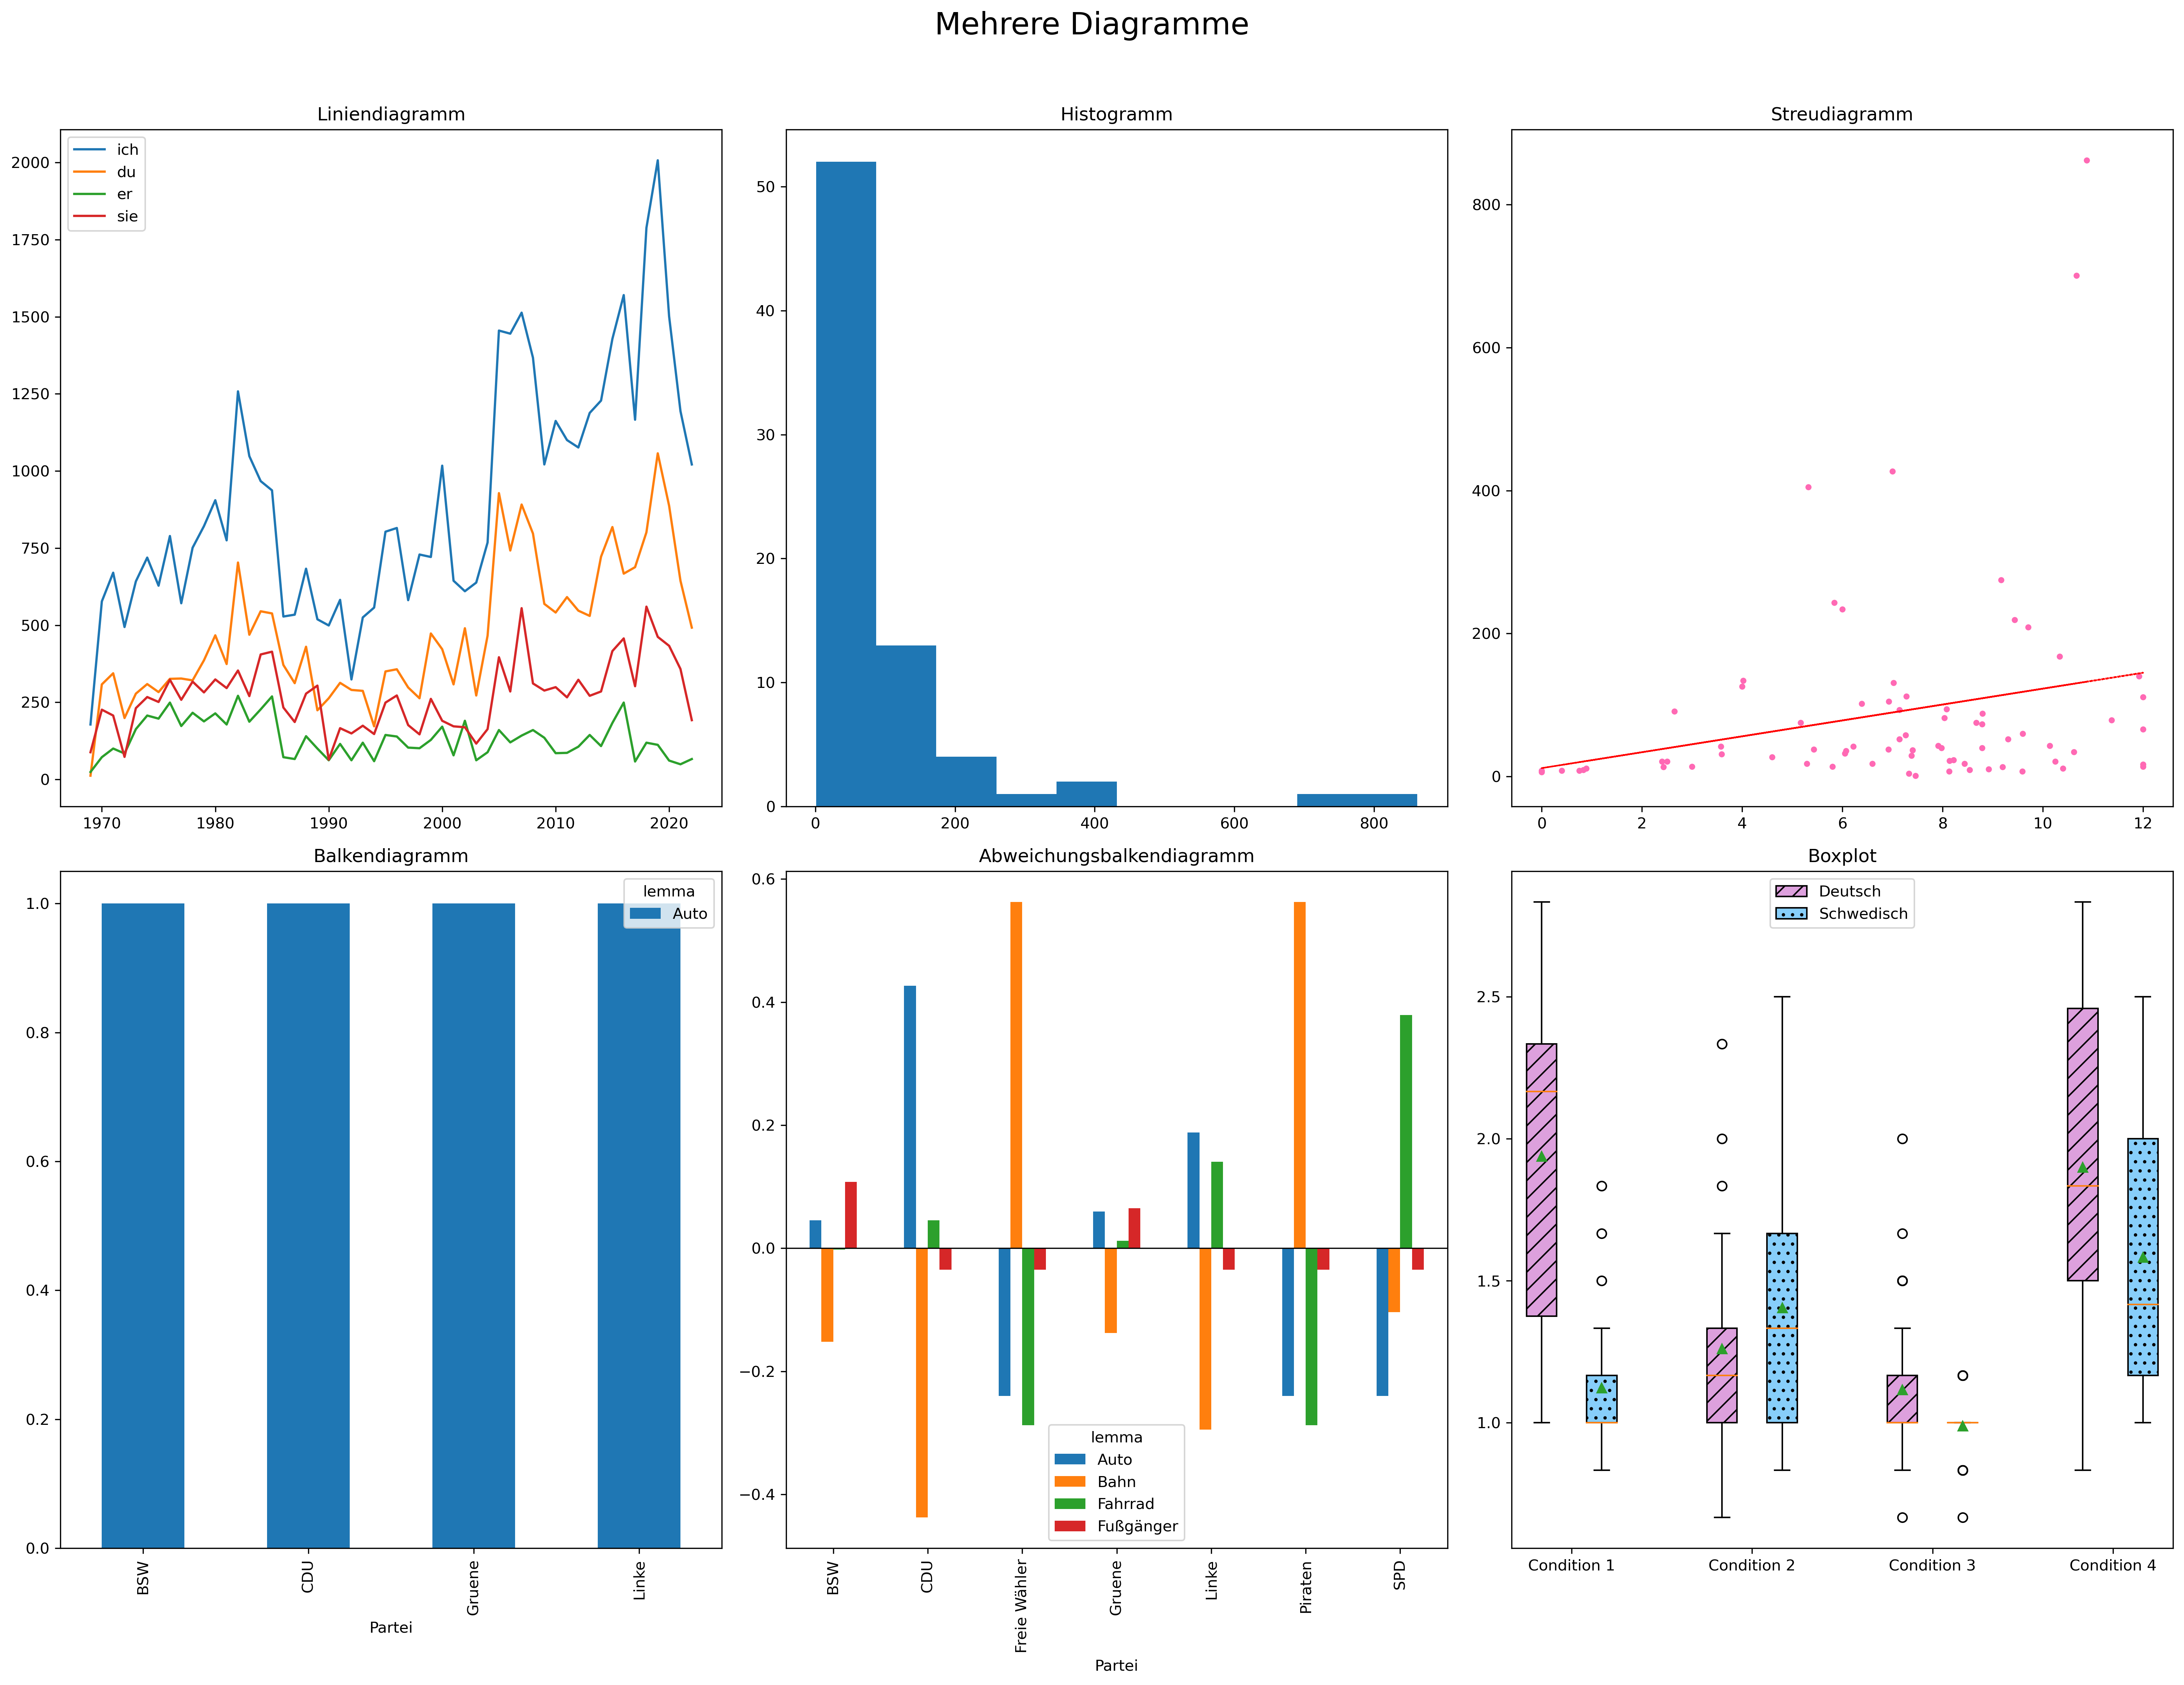

In [44]:
#Erstellen einer Diagrammfläche inkl. Subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 15), dpi=300)
fig.suptitle("Mehrere Diagramme", fontsize=20, y=1.02) #'y'-Parameter sorgt für Padding

"""Liniendiagramm"""
for word in words:
    sub_df = songkorpus[songkorpus.Token == word]
    axs[0, 0].plot(sub_df.Jahr, sub_df.Häufigkeit)

axs[0, 0].set_title("Liniendiagramm")
axs[0, 0].legend(words, loc="best")

"""Histogramm"""
axs[0, 1].hist(climate_lang.Langs) 
axs[0, 1].set_title("Histogramm")

"""Streudiagramm"""
axs[0, 2].scatter(climate_lang.MGS, climate_lang.Langs, marker=".", color="#FF69B4")
axs[0, 2].set_title("Streudiagramm")
axs[0, 2].plot(climate_lang.MGS, slope*climate_lang.MGS + intercept, color="red", linestyle=":", linewidth=1)

"""Balkendiagramm (mit 'pandas'-Plotting-Syntax)"""
modal_verbs_by_party.plot(kind="bar", ax=axs[1,0])
axs[1, 0].set_title("Balkendiagramm")
axs[1,0].set_xlabel("Partei")

"""Abweichungsbalkendiagramm (mit 'pandas'-Plotting-Syntax)"""
adjusted_counts.plot(kind="bar", ax=axs[1,1])
axs[1,1].set_title("Abweichungsbalkendiagramm")
axs[1,1].set_xlabel("Partei")
axs[1,1].axhline(0, color="black", linewidth=0.8)

"""Boxplot"""
axs[1, 2].boxplot(results_german, positions=positions_german, patch_artist=True, showmeans=True, boxprops=dict(facecolor="plum", hatch="//"))
axs[1, 2].boxplot(results_swedish, positions=positions_swedish, patch_artist=True, showmeans=True, boxprops=dict(facecolor="lightskyblue", hatch=".."))
axs[1, 2].set_title("Boxplot")
axs[1, 2].set_xticks([0.5, 3.5, 6.5, 9.5], labels=["Condition 1", "Condition 2", "Condition 3", "Condition 4"])
axs[1, 2].legend(handles=[plt.Rectangle((0, 0), 1, 1, facecolor="plum", edgecolor="black", hatch="//", label="Deutsch"),
                          plt.Rectangle((0, 0), 1, 1, facecolor="lightskyblue", edgecolor="black", hatch="..", label="Schwedisch")], loc="upper center")

plt.tight_layout()
plt.show()

In [ ]:
#Speichern eines objektorientierten Plots
fig.savefig("../3_Dateien/Output/multiple_figures.png") #'fig'!